==================================================================================================================================
# <div align="center">PROJECT 03: Etsy Print-On-Demand Trends</div>
==================================================================================================================================

### 📝 BUSINESS IDEA

**Print-On-Demand (POD) Business** – What the project is about

### ⚠️ PROBLEM

No Free API exists to access the market data needed, requiring web scraping to gather insights – The challenge we’re addressing

### 🔰 SOLUTION FRAMEWORK

Web scrape etsy for a specific POD product

Collect the data necessary to clean & analyze


| **Development**                                                                                                                                             | **Presentation**                 |
| ----------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------- |
| **Business Idea** → **Problem Definition** → **Data Research & Visualization** → **Insights** → **Interpretation** → **Implications** → **Business Impact** | **Limitations & Considerations** |


---

### 📓 SECTION OVERVIEW

- **Project / Business Idea:** What the project is about

- **Problem:** The challenge we’re addressing

- **Solution / Approach:** How we solve it

- **Research & Plots:** How we analyzed data visually

- **Insights:** What we discovered

- **Interpretation:** Why it matters

- **Implications:** What actions the business can take

- **Business Impact:** Expected results for the business

- **Limitations:** What constraints or gaps exist

==================================================================================================================================
# <div align="center">RESEARCH</div>
==================================================================================================================================

### 🌐 **Which Are the Best-Selling POD Products on Etsy?**

I’m researching print-on-demand products to sell on Etsy that only require **digital artwork and marketing**, while the POD provider handles **printing, packaging, and shipping**.


### ⭐ **Using Google Trends for POD Product Research**
💡 **Goal:** Identify which POD product category has been searched the most on Google over the past 5 years (2020–2025).

Below is the list of product categories I’m comparing:

### 🎯 **Chosen POD product to research is :** `tote bags`

| Category              | Subcategories / Examples                                      |
|-----------------------|---------------------------------------------------------------|
| **Custom Apparel**        | T-shirts, Hoodies, Sweatshirts, Tank tops                     |
| **Mug**                   | Ceramic mugs, Color-changing mugs, Espresso mugs, Travel mugs |
| **Tote Bag**              | Cotton totes, All-over print totes                            |
| **Phone Case**            | iPhone / Samsung cases, Tough / Slim cases                    |
| **Stickers**              | Die-cut stickers, Kiss-cut stickers, Sticker sheets           |
| **Hats**                  | Baseball caps, Trucker hats, Beanies                          |
| **Pillows / Cushions**    | Pillow covers, Stuffed pillows, All-over print pillow designs|
| **Blanket**               | Fleece blankets, Sherpa blankets, Woven blankets             |
| **Wall Art**              | Posters, Canvas prints, Framed posters, Metal prints         |
| **Doormat**               | Printed coir doormats, Rubber-backed doormats                |
| **Drinkware**             | Stainless steel tumblers, Water bottles, Wine tumblers       |
| **Calendar**              | Custom printed wall calendars                                 |
| **Yoga Mat**              | Printed yoga mats                                             |
| **Bedding**               | Duvet covers, Pillowcases, All-over print bed sets           |
| **Pet Accessories**       | Pet bandanas, Pet beds, Pet bowls, Pet blankets              |
| **Ornaments**             | Ceramic ornaments, Wood ornaments, Metal ornaments           |


### **BEFORE GETTING STARTED :**

```Etsy``` is a dynamic website, so scraping it requires careful handling.

Since ```Etsy``` uses ```JavaScript``` to load some content,

```requests``` +  ``BeautifulSoup`` might work for static parts (like search results), 

but for dynamic content, ``Selenium`` is more reliable. 

I will be using ``requests`` + ``BeautifulSoup`` for ```product listings``` **(title, price, link)**

Important Note: Etsy uses dynamic loading + anti-bot protections.

Using code with standard HTML scraping can work as long as Etsy doesn’t block the request.

If blocked, using headers, rotating proxies, or the Etsy API will be required.

=======================================================================================================================================================================================
# <div align="center">WEB SCRAPING</div>
=======================================================================================================================================================================================

### 🧐 QUESTIONS

- Which keywords in product titles and descriptions drive the most sales?

- What keywords improve search visibility on Etsy?

- Which product niches have the highest demand?

- When is the best period to sell based on review trends?

- Which price ranges generate the most sales?

- Which country's customers are buying the most of this product?

----

### 🧰 **Install for web scraping**

In [ ]:
# install requests & beautifulsoup
!pip install requests beautifulsoup4 fake-useragent pandas

# install selenium
!pip install selenium pandas

---

### 📌 **Avoid web BLOCKED**
| Version                                   | Best For          | Pros                                           | Cons                          |
| ----------------------------------------- | ----------------- | ---------------------------------------------- | ----------------------------- |
| **Requests + BeautifulSoup + Pagination** | Simple scraping   | Fast, clean                                    | Etsy may block request        |
| **Selenium + BeautifulSoup + Pagination** | Reliable scraping | Bypasses bot protection, loads dynamic content | Slower, requires ChromeDriver |


---

## 📌 **Product PAGE**

### ⭐ **Product dataset**

The main data fields to extract from Etsy's product page :


| Field Name             | Python Data Type       | Concise Definition                      | Long Definition                                                                                       |
|------------------------|-----------------------|----------------------------------------|-------------------------------------------------------------------------------------------------------|
| **product_title**          | `str`                 | Product title                           | The full name of the product, same across all variants.                                              |
| **product_url**           | `str`                 | Short URL to product listing        | Etsy listing URL in the format `https://www.etsy.com/listing/product_id/` (e.g., "https://www.etsy.com/listing/1289965137/"). |
| **product_id**             | `int`                 | Unique product ID                       | Extracted from `product_url`; a unique identifier assigned by Etsy for each listing.               |
| **product_description**            | `str`                | Product's description           | The text content of the description of the product.                                               |
| **variations**        | `List`          | product variations / eg colour, style, material...               | List of all product variations (size, color, material, etc.), each stored as a dictionary.             |
| **current_price**      | `float`  | Current price of product               | Price of this variant after applying any discounts.                                                  |
| **old_price**          | `float`  | Original price of product              | Price of this variant before any discounts were applied (if available).                              |
| **discount_percentage**| `float`               | Variant discount percentage             | Discount applied to this variant, calculated if both current and old prices are available.           |
| **product_rating**         | `float`               | Average product rating                  | Average rating of the product out of 5 (e.g., 4.5).                                                 |
| **nbr_reviews**            | `int`                 | Total number of reviews                 | Total count of reviews received by the product.                                                     |

---

#### **`product_niche` from `product_title` and `product_description`**

| Field Name                 | Python Data Type       | Concise Definition                               |
|---------------------------|-------------------------|---------------------------------------------------|
| **product_niche**             | `str`                     | Product theme or genre (comedy, anime…)     |

---

### ⭐ **Reviews dataset**

All Reviews of the best-selling product 

| Field Name               | Python Data Type | Concise Definition                                      |
|--------------------------|------------------|----------------------------------------------------------|
| **review_variation**   | `str`            | The variation text the customer of the product purchased   |
| **review_comment**   | `str`            | The comment the customer gave the product   |
| **review_rating**        | `float`          | The rating the customer gave the product                 |
| **review_date**          | `date`           | The date when the customer posted the review             |


---

=======================================================================================================================================================================================
# <div align="center">CODING</div>
=======================================================================================================================================================================================

### 📌 STEP 8 - RE SCAPE 2000 products because of the reviews

#### Convert 'old_price' to numeric and replace NaN with 0

In [ ]:
# -------------------------
# Convert 'old_price' to numeric and replace NaN with 0
# -------------------------
if "old_price" in df.columns:
    df["old_price"] = pd.to_numeric(df["old_price"], errors='coerce')
    df["old_price"] = df["old_price"].fillna(0)


### 📌 STEP 7 - COMBINE CSV FILES PARTS

In [ ]:
import pandas as pd

# Load all CSV files
df1 = pd.read_csv("../data/raw/01_part.csv")
df2 = pd.read_csv("../data/raw/02_part.csv")
df3 = pd.read_csv("../data/raw/03_part.csv")
df4 = pd.read_csv("../data/raw/04_part.csv")
df5 = pd.read_csv("../data/raw/05_part.csv")
df6 = pd.read_csv("../data/raw/06_part.csv")

# COMBINE and REMOVE DUPLICATES by product_id
df = pd.concat([df1, df2, df3,df4,df5,df6]).drop_duplicates(subset='product_id', keep='first').reset_index(drop=True)

# Save final combined dataset
df.to_csv("../data/interim/etsy_pod.csv", index=False)

# df is the main dataframe
print(f"etsy_pod.csv : {len(df1)} + {len(df2)} + {len(df3)} + {len(df4)} + {len(df5)} + {len(df6)} = {len(df)} unique products")
df.shape

# save etsy_pod.csv in google drive to load from

Combined: 381 + 200 + 500 + 4 + 313 + 330 = 1279 unique products


(1279, 8)

### STEP 6 - PART 6 - FROM 1223

In [40]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
from urllib.parse import urlparse

# --------------------------
# Chrome options + NEW driver
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions (same as before)
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None


def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0


def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None


def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None


def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        # current price
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        # old price and discount
        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }


# --------------------------
# Continue scraping after 1222 (start at 1223)
# --------------------------
def scrape_next_batch_after_existing(existing_csv_path,
                                     start_index=1222,
                                     new_to_collect=778,  # 2000 - 1222 = 778
                                     output_csv_path="../data/interim/etsy_dataset_part4_from_1223.csv"):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_new_products = []
    seen_ids = set()
    page = 1

    # Load existing CSV to avoid duplicates
    try:
        df_prev = pd.read_csv(existing_csv_path)
        for pid in df_prev["product_id"].dropna().astype(str):
            seen_ids.add(pid)
        print(f"Loaded {len(seen_ids)} existing product_ids from {existing_csv_path}")
    except Exception as e:
        print(f"Could not load previous CSV (will still work, but may re-scrape some): {e}")

    target_total = start_index + new_to_collect  # want to reach index 2000

    while start_index + len(all_new_products) < target_total:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        try:
            driver.get(url)
        except Exception as e:
            print(f"Driver error on page {page}: {e}")
            break

        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div.v2-listing-card"))
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        new_on_page = 0
        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = str(data.get("product_id"))
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_new_products.append(data)
                new_on_page += 1
                current_index = start_index + len(all_new_products)
                print(f"Collected #{current_index}: {data['product_title'][:60]}")
            if start_index + len(all_new_products) >= target_total:
                break

        if new_on_page == 0:
            print("No new products on this page, likely reached end or blocked.")
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    # Save only the new products for this run
    df_new = pd.DataFrame(all_new_products)
    df_new.to_csv(output_csv_path, index=False)
    print(f"Saved {len(df_new)} new products to {output_csv_path}")

    return df_new


if __name__ == "__main__":
    # Combined file with everything you already have (1–1222)
    existing_csv = "../data/interim/Samia_dataset.csv"

    already_have = 1222          # last existing index
    to_collect_now = 778         # to reach 2000 total

    df_new = scrape_next_batch_after_existing(
        existing_csv_path=existing_csv,
        start_index=already_have,          # start at 1223
        new_to_collect=to_collect_now,
        output_csv_path="../data/interim/etsy_dataset_part4_from_1223.csv"
    )
    print(df_new.head())


Loaded 911 existing product_ids from ../data/interim/Samia_dataset.csv
Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected #1223: Sac en toile de jute nom floral pour cadeau de proposition d
Collected #1224: Cabas personnalisé avec initiales brodées, sac fourre-tout p
Collected #1225: Sac fourre-tout chat mignon, sac en toile minimaliste, cadea
Collected #1226: Sac fourre-tout personnalisé en velours côtelé brodé - Cadea
Collected #1227: Sac fourre-tout vintage pressé fleurs sauvages : cadeau flor
Collected #1228: Sac cadeau personnalisé de demoiselle d'honneur, sac fourre-
Collected #1229: Sac fourre-tout personnalisé, sac fourre-tout avec nom, sac 
Collected #1230: Sac fourre-tout idiot, Got Too Silly, sac d'oie, fourre-tout
Collected #1231: Sac fourre-tout avec nom personnalisé, Cabas personnalisé en
Collected #1232: vintage multi-poches en velours côtelé à bandoulière et nom 
Collected #1233: Sac fourre-tout coloré en forme de chat,

### STEP 05 - PART 5 - UP TO 2000 PRODUCTS

In [36]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
from urllib.parse import urlparse


# --------------------------
# Chrome options + NEW driver
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)


# --------------------------
# Helper functions (same as before)
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None


def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0


def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None


def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None


def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        # current price
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        # old price and discount
        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }


# --------------------------
# Continue scraping after 910 (start at 911)
# --------------------------
def scrape_next_batch_after_existing(existing_csv_path,
                                     start_index=910,
                                     new_to_collect=1090,  # 911..2000 inclusive
                                     output_csv_path="../data/interim/etsy_dataset_part4_from_911.csv"):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_new_products = []
    seen_ids = set()
    page = 1

    # Load existing CSV to avoid duplicates
    try:
        df_prev = pd.read_csv(existing_csv_path)
        for pid in df_prev["product_id"].dropna().astype(str):
            seen_ids.add(pid)
        print(f"Loaded {len(seen_ids)} existing product_ids from {existing_csv_path}")
    except Exception as e:
        print(f"Could not load previous CSV (will still work, but may re-scrape some): {e}")

    target_total = start_index + new_to_collect  # want to reach index 2000

    while start_index + len(all_new_products) < target_total:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        try:
            driver.get(url)
        except Exception as e:
            print(f"Driver error on page {page}: {e}")
            break

        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div.v2-listing-card"))
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        new_on_page = 0
        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = str(data.get("product_id"))
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_new_products.append(data)
                new_on_page += 1
                current_index = start_index + len(all_new_products)
                print(f"Collected #{current_index}: {data['product_title'][:60]}")
            if start_index + len(all_new_products) >= target_total:
                break

        if new_on_page == 0:
            print("No new products on this page, likely reached end or blocked.")
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    # Save only the new products for this run
    df_new = pd.DataFrame(all_new_products)
    df_new.to_csv(output_csv_path, index=False)
    print(f"Saved {len(df_new)} new products to {output_csv_path}")

    return df_new


if __name__ == "__main__":
    # This should be your combined file that already contains rows 1–910
    existing_csv = "../data/interim/Samia_dataset.csv"
    already_have = 910
    to_collect_now = 1090  # to reach 2000

    df_new = scrape_next_batch_after_existing(
        existing_csv_path=existing_csv,
        start_index=already_have,          # start counting at 911
        new_to_collect=to_collect_now,
        output_csv_path="../data/interim/etsy_dataset_part4_from_911.csv"
    )
df_new.head()

Loaded 911 existing product_ids from ../data/interim/Samia_dataset.csv
Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected #911: Sac en toile de jute nom floral pour cadeau de proposition d
Collected #912: Cabas personnalisé avec initiales brodées, sac fourre-tout p
Collected #913: Sac fourre-tout chat mignon, sac en toile minimaliste, cadea
Collected #914: Sac fourre-tout personnalisé en velours côtelé brodé - Cadea
Collected #915: Joli sac fourre-tout rétro en velours côtelé avec bandoulièr
Collected #916: Sac fourre-tout vintage pressé fleurs sauvages : cadeau flor
Collected #917: Sac fourre-tout personnalisé, sac fourre-tout avec nom, sac 
Collected #918: Sac cadeau personnalisé de demoiselle d'honneur, sac fourre-
Collected #919: Sac fourre-tout coloré en forme de chat, sac à bandoulière f
Collected #920: Sac fourre-tout floral fleurs sauvages - Sac de marché en to
Collected #921: vintage multi-poches en velours côtelé à bandoulièr

,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/1793192581/sac...,1793192581,Sac en toile de jute nom floral pour cadeau de...,4.7584,4400,1.51,4.31,65.0
1,https://www.etsy.com/fr/listing/4407721060/cab...,4407721060,"Cabas personnalisé avec initiales brodées, sac...",4.7516,7900,3.80,12.67,70.0
2,https://www.etsy.com/fr/listing/4373362161/sac...,4373362161,"Sac fourre-tout chat mignon, sac en toile mini...",4.7933,209,4.31,8.61,50.0
3,https://www.etsy.com/fr/listing/4409630241/sac...,4409630241,Sac fourre-tout personnalisé en velours côtelé...,4.8338,2800,10.68,21.36,50.0
4,https://www.etsy.com/fr/listing/1482374993/jol...,1482374993,Joli sac fourre-tout rétro en velours côtelé a...,4.9540,6400,21.57,30.81,30.0


---

### STEP 03 - PART 4 - Extracted from 411 up to 910/1000 from product listings

In [95]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
from urllib.parse import urlparse

# --------------------------
# Chrome options + NEW driver
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions (same as before)
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None

def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0

def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None

def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None

def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        # current price
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        # old price and discount
        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }

# --------------------------
# Continue scraping after 410 (start at 411)
# --------------------------
def scrape_next_batch_after_existing(existing_csv_path,
                                     start_index=410,
                                     new_to_collect=500,
                                     output_csv_path="../data/interim/etsy_dataset_part2_from_411_to_910.csv"):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_new_products = []
    seen_ids = set()
    page = 1

    # Load existing CSV to avoid duplicates
    try:
        df_prev = pd.read_csv(existing_csv_path)
        for pid in df_prev["product_id"].dropna().astype(str):
            seen_ids.add(pid)
        print(f"Loaded {len(seen_ids)} existing product_ids from {existing_csv_path}")
    except Exception as e:
        print(f"Could not load previous CSV (will still work, but may re-scrape some): {e}")

    target_total = start_index + new_to_collect

    while start_index + len(all_new_products) < target_total:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        try:
            driver.get(url)
        except Exception as e:
            print(f"Driver error on page {page}: {e}")
            break

        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div.v2-listing-card"))
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        new_on_page = 0
        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = str(data.get("product_id"))
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_new_products.append(data)
                new_on_page += 1
                current_index = start_index + len(all_new_products)
                print(f"Collected #{current_index}: {data['product_title'][:60]}")
            if start_index + len(all_new_products) >= target_total:
                break

        if new_on_page == 0:
            print("No new products on this page, likely reached end or blocked.")
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    # Save only the new products for this run
    df_new = pd.DataFrame(all_new_products)
    df_new.to_csv(output_csv_path, index=False)
    print(f"Saved {len(df_new)} new products to {output_csv_path}")

    return df_new

if __name__ == "__main__":
    existing_csv = "../data/interim/etsy_dataset_final.csv"  # contains products 1–410
    already_have = 410
    to_collect_now = 500  # try to get 500 new products (411–910)

    df_new = scrape_next_batch_after_existing(
        existing_csv_path=existing_csv,
        start_index=already_have,  # start at 411
        new_to_collect=to_collect_now,
        output_csv_path="../data/interim/etsy_dataset_part2_from_411_to_910.csv"
    )
df_new.head()


Loaded 411 existing product_ids from ../data/interim/etsy_dataset_final.csv
Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected #411: Sac fourre-tout personnalisé, cadeau de demoiselle d'honneur
Collected #412: Sac fourre-tout personnalisé en toile brodée : sac à main or
Loading page 2: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=2
Collected #413: Sac fourre-tout personnalisé | Sac en toile brodé | fourre-t
Collected #414: Sac fourre-tout en toile personnalisé, sac de plage avec nom
Collected #415: Sac-cadeau personnalisé de demoiselle d'honneur avec breloqu
Loading page 3: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=3
Collected #416: Sacs fourre-tout de demoiselle d'honneur avec broderie perso
Collected #417: Sac fourre-tout personnalisé, sac fourre-tout cadeaux de dem
Collected #418: Sac de plage personnalisé pour voyage de filles/sac fourre-t
Collected #419: Sac cabas person

,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4306198508/sac...,4306198508,"Sac fourre-tout personnalisé, cadeau de demois...",4.7861,2000,1.04,1.89,45.0
1,https://www.etsy.com/fr/listing/4360248759/sac...,4360248759,Sac fourre-tout personnalisé en toile brodée :...,4.8000,25,14.86,49.53,70.0
2,https://www.etsy.com/fr/listing/4330505869/sac...,4330505869,Sac fourre-tout personnalisé | Sac en toile br...,4.8427,104,7.37,17.54,58.0
3,https://www.etsy.com/fr/listing/4304272673/sac...,4304272673,"Sac fourre-tout en toile personnalisé, sac de ...",4.8201,3200,5.19,8.66,40.0
4,https://www.etsy.com/fr/listing/4301824291/sac...,4301824291,Sac-cadeau personnalisé de demoiselle d'honneu...,4.8708,10800,3.25,6.49,50.0


---

### STEP 03 - COMBINED AND REMOVED DUPLICATES USING PRODUCT ID

In [92]:
import pandas as pd

# Load all 3 CSVs (part1, part2, part3)
df1 = pd.read_csv("../data/interim/etsy_dataset_part1_from_1.csv")
df2 = pd.read_csv("../data/interim/etsy_dataset_part2_from_381.csv")
df3 = pd.read_csv("../data/interim/etsy_dataset_part3_from_581.csv")

# Combine and remove duplicates by product_id
combined = pd.concat([df1, df2, df3]).drop_duplicates(subset='product_id', keep='first').reset_index(drop=True)

# Save final combined dataset
combined.to_csv("../data/interim/etsy_dataset_final.csv", index=False)
print(f"Combined: {len(df1)} + {len(df2)} + {len(df3)} = {len(combined)} unique products")
print(combined.head())


Combined: 381 + 200 + 4 = 411 unique products
                                         product_url  product_id  \
0  https://www.etsy.com/fr/listing/4392351544/sac...  4392351544   
1  https://www.etsy.com/fr/listing/1852832959/sac...  1852832959   
2  https://www.etsy.com/fr/listing/4373938822/sac...  4373938822   
3  https://www.etsy.com/fr/listing/4387299123/sac...  4387299123   
4  https://www.etsy.com/fr/listing/4359920915/sac...  4359920915   

                                       product_title  product_rating  \
0  Sac cabas en velours côtelé personnalisé, sac ...          4.9044   
1  Sac fourre-tout en toile brodée, sac de plage ...          4.7559   
2  Sac fourre-tout minimaliste personnalisé pour ...          4.9880   
3  Sac fourre-tout en coton matelassé : imprimé f...          4.7826   
4  Sac fourre-tout personnalisé en toile de jute|...          4.9002   

   nbr_reviews  current_price  old_price  discount_percentage  
0         3900          10.68      19.42        

In [93]:
combined.shape

(411, 8)

---

### STEP 03 - PART 3 - Extracted from 411 up to 414/500 from product listings
There were duplicates had to revise the dataset

In [85]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
from urllib.parse import urlparse

# --------------------------
# Chrome options + NEW driver
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions (same as before)
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None

def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0

def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None

def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None

def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }

# --------------------------
# Continue scraping after 581
# --------------------------
def scrape_next_batch_after_existing(existing_csv_paths,
                                     start_index=581,
                                     new_to_collect=419,
                                     output_csv_path="../data/interim/etsy_dataset_part3_from_581.csv"):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_new_products = []
    seen_ids = set()
    
    # Load all previous CSVs product_ids to avoid duplicates
    for csv_path in existing_csv_paths:
        try:
            df_prev = pd.read_csv(csv_path)
            seen_ids.update(df_prev["product_id"].dropna().astype(str))
            print(f"Loaded {len(df_prev)} product IDs from {csv_path}")
        except Exception as e:
            print(f"Could not load previous CSV {csv_path}: {e}")

    page = 1
    target_total = start_index + new_to_collect

    while start_index + len(all_new_products) < target_total:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        try:
            driver.get(url)
        except Exception as e:
            print(f"Driver error on page {page}: {e}")
            break

        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div.v2-listing-card"))
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        new_on_page = 0
        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = str(data.get("product_id"))
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_new_products.append(data)
                new_on_page += 1
                current_index = start_index + len(all_new_products)
                print(f"Collected #{current_index}: {data['product_title'][:60]}")

            if start_index + len(all_new_products) >= target_total:
                break

        if new_on_page == 0:
            print("No new products on this page, likely reached end or blocked.")
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    df_new = pd.DataFrame(all_new_products)
    df_new.to_csv(output_csv_path, index=False)
    print(f"Saved {len(df_new)} new products to {output_csv_path}")

    return df_new

if __name__ == "__main__":
    previous_csvs = [
        "../data/interim/etsy_dataset.csv",                  # original 381
        "../data/interim/etsy_dataset_part2_from_381.csv",   # part 2
    ]
    already_have = 581
    to_collect_now = 419  # to reach 1000 total

    df_new = scrape_next_batch_after_existing(
        existing_csv_paths=previous_csvs,
        start_index=already_have,
        new_to_collect=to_collect_now,
        output_csv_path="../data/interim/etsy_dataset_part3_from_581.csv"
    )
    print(df_new.head())


Could not load previous CSV ../data/interim/etsy_dataset.csv: [Errno 2] No such file or directory: '../data/interim/etsy_dataset.csv'
Loaded 200 product IDs from ../data/interim/etsy_dataset_part2_from_381.csv
Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected #582: Sac fourre-tout de Noël en velours côtelé avec nom personnal
Loading page 2: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=2
Collected #583: Sacs cadeaux personnalisés de demoiselle d'honneur, sacs en 
Collected #584: Sac fourre-tout personnalisé, cadeau de demoiselle d'honneur
Collected #585: Dieu est tellement plus grand qu'un sac fourre-tout, sac fou
Loading page 3: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=3
No listings found on page 3: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: chrome=142.0.7444.176); For d

---

### STEP 03 - PART 2 - Extracted from 381 up to 411/500 from product listings

In [80]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
from urllib.parse import urlparse


# --------------------------
# Chrome options + NEW driver
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)


# --------------------------
# Helper functions (same as before)
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None


def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0


def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None


def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None


def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        # current price
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        # old price and discount
        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }


# --------------------------
# Continue scraping after 381
# --------------------------
def scrape_next_batch_after_existing(existing_csv_path,
                                     start_index=381,
                                     new_to_collect=200,
                                     output_csv_path="../data/interim/etsy_dataset_part2_from_381.csv"):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_new_products = []
    seen_ids = set()
    page = 1

    # Load existing CSV to avoid duplicates
    try:
        df_prev = pd.read_csv(existing_csv_path)
        for pid in df_prev["product_id"].dropna().astype(str):
            seen_ids.add(pid)
        print(f"Loaded {len(seen_ids)} existing product_ids from {existing_csv_path}")
    except Exception as e:
        print(f"Could not load previous CSV (will still work, but may re-scrape some): {e}")

    target_total = start_index + new_to_collect

    while start_index + len(all_new_products) < target_total:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        try:
            driver.get(url)
        except Exception as e:
            print(f"Driver error on page {page}: {e}")
            break

        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div.v2-listing-card"))
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        new_on_page = 0
        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = str(data.get("product_id"))
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_new_products.append(data)
                new_on_page += 1
                current_index = start_index + len(all_new_products)
                print(f"Collected #{current_index}: {data['product_title'][:60]}")
            if start_index + len(all_new_products) >= target_total:
                break

        if new_on_page == 0:
            print("No new products on this page, likely reached end or blocked.")
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    # Save only the new products for this run
    df_new = pd.DataFrame(all_new_products)
    df_new.to_csv(output_csv_path, index=False)
    print(f"Saved {len(df_new)} new products to {output_csv_path}")

    return df_new


if __name__ == "__main__":
    existing_csv = "../data/interim/etsy_dataset.csv"  # first 381
    already_have = 381
    to_collect_now = 200  # change if you want

    df_new = scrape_next_batch_after_existing(
        existing_csv_path=existing_csv,
        start_index=already_have,
        new_to_collect=to_collect_now,
        output_csv_path="../data/interim/etsy_dataset_part2_from_381.csv"
    )
    print(df_new.head())


Could not load previous CSV (will still work, but may re-scrape some): [Errno 2] No such file or directory: '../data/interim/etsy_dataset.csv'
Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected #382: Sac cabas en velours côtelé personnalisé, sac en velours côt
Collected #383: Sacs fourre-tout à logo personnalisés Sacs d'épicerie promot
Collected #384: Sac fourre-tout en toile brodée, sac de plage personnalisé a
Collected #385: Sac fourre-tout minimaliste personnalisé pour tous les jours
Collected #386: Sac fourre-tout personnalisé en toile de jute| Sac de demois
Collected #387: Sac cabas en velours côtelé personnalisé, sac en velours côt
Collected #388: Sac fourre-tout en toile personnalisé, sac fourre-tout LOGO 
Collected #389: Tote Bag Petit Bazar Personnalisé - Idéal pour Cadeaux !
Collected #390: Sac fourre-tout en coton matelassé à imprimé jungle fait mai
Collected #391: Sac cabas en jute et trousse personnalisées / cadeau maîtres

In [81]:
df.head()

,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4392351544/sac...,4392351544,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
1,https://www.etsy.com/fr/listing/1852832959/sac...,1852832959,"Sac fourre-tout en toile brodée, sac de plage ...",4.7559,1300,6.95,17.37,60.0
2,https://www.etsy.com/fr/listing/4373938822/sac...,4373938822,Sac fourre-tout minimaliste personnalisé pour ...,4.9880,83,10.42,20.83,50.0
3,https://www.etsy.com/fr/listing/4387299123/sac...,4387299123,Sac fourre-tout en coton matelassé : imprimé f...,4.7826,168,17.56,23.42,25.0
4,https://www.etsy.com/fr/listing/4359920915/sac...,4359920915,Sac fourre-tout personnalisé en toile de jute|...,4.9002,846,2.31,5.15,55.0


---

### STEP 03 - PART 1 - Extracted up to 381/500 from product listings

In [78]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import json
import re
import time
import random
from urllib.parse import urlparse, unquote


# --------------------------
# Chrome options
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)


# --------------------------
# Helper functions
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None


def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0


def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None


def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None


# --------------------------
# Extract product data from a listing card
# --------------------------
def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        # current price
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        # old price and discount
        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            # e.g. "(60% off)" -> 60
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    # Fallback: compute discount if both prices present and percentage missing
    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }


# --------------------------
# Scrape best-selling products from listings pages
# --------------------------
def scrape_best_selling_products_from_listings(product_limit=10):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_products = []
    seen_ids = set()
    page = 1

    while len(all_products) < product_limit:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        driver.get(url)

        # Wait for listing cards to load
        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located(
                    (By.CSS_SELECTOR, "div.v2-listing-card")
                )
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = data.get("product_id")
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_products.append(data)
                print(f"Collected {len(all_products)}/{product_limit}: {data['product_title'][:60]}")
            if len(all_products) >= product_limit:
                break

        # Stop if no new products were added on this page
        if len(all_products) >= product_limit:
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    return all_products


# --------------------------
# Run scraper
# --------------------------
if __name__ == "__main__":
    product_limit = 1000  # adjust as needed
    products = scrape_best_selling_products_from_listings(product_limit)
    df = pd.DataFrame(products)
    df.to_csv("../data/clean/1000_etsy_dataset.csv", index=False)
    print("Scraping finished!")
df.head()


Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected 1/1000: Sac cabas en velours côtelé personnalisé, sac en velours côt
Collected 2/1000: Sac fourre-tout en toile brodée, sac de plage personnalisé a
Collected 3/1000: Sac fourre-tout minimaliste personnalisé pour tous les jours
Collected 4/1000: Sac fourre-tout en coton matelassé : imprimé floral personna
Collected 5/1000: Sac fourre-tout personnalisé en toile de jute| Sac de demois
Collected 6/1000: Sac cabas en velours côtelé personnalisé, sac en velours côt
Collected 7/1000: Sac fourre-tout en toile personnalisé, sac fourre-tout LOGO 
Collected 8/1000: Tote Bag Petit Bazar Personnalisé - Idéal pour Cadeaux !
Collected 9/1000: Sac fourre-tout en coton matelassé à imprimé jungle fait mai
Collected 10/1000: Sac cabas en jute et trousse personnalisées / cadeau maîtres
Collected 11/1000: Sac fourre-tout personnalisé en toile de jute| Sac de demois
Collected 12/1000: Fourre-tout personnali

,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4392351544/sac...,4392351544,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
1,https://www.etsy.com/fr/listing/1852832959/sac...,1852832959,"Sac fourre-tout en toile brodée, sac de plage ...",4.7559,1300,6.95,17.37,60.0
2,https://www.etsy.com/fr/listing/4373938822/sac...,4373938822,Sac fourre-tout minimaliste personnalisé pour ...,4.9880,83,10.42,20.83,50.0
3,https://www.etsy.com/fr/listing/4387299123/sac...,4387299123,Sac fourre-tout en coton matelassé : imprimé f...,4.7826,168,17.56,23.42,25.0
4,https://www.etsy.com/fr/listing/4359920915/sac...,4359920915,Sac fourre-tout personnalisé en toile de jute|...,4.9002,846,2.31,5.15,55.0


---

### STEP 02 - Extracted exactly 50/500 from product page to test limit

In [ ]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import json
import re
import time
import random
from urllib.parse import urlparse, unquote


# --------------------------
# Chrome options
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)


# --------------------------
# Helper functions
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None


def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0


def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None


def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None


# --------------------------
# Extract product data from a listing card
# --------------------------
def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        # current price
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        # old price and discount
        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            # e.g. "(60% off)" -> 60
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    # Fallback: compute discount if both prices present and percentage missing
    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }


# --------------------------
# Scrape best-selling products from listings pages
# --------------------------
def scrape_best_selling_products_from_listings(product_limit=10):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_products = []
    seen_ids = set()
    page = 1

    while len(all_products) < product_limit:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        driver.get(url)

        # Wait for listing cards to load
        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located(
                    (By.CSS_SELECTOR, "div.v2-listing-card")
                )
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = data.get("product_id")
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_products.append(data)
                print(f"Collected {len(all_products)}/{product_limit}: {data['product_title'][:60]}")
            if len(all_products) >= product_limit:
                break

        # Stop if no new products were added on this page
        if len(all_products) >= product_limit:
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    return all_products


# --------------------------
# Run scraper
# --------------------------
if __name__ == "__main__":
    product_limit = 50  # adjust as needed
    products = scrape_best_selling_products_from_listings(product_limit)
    df = pd.DataFrame(products)
    df.to_csv("../data/clean/etsy_dataset.csv", index=False)
    print("Scraping finished!")
df.head()


Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected 1/50: Sac cabas en velours côtelé personnalisé, sac en velours côt
Collected 2/50: Sac fourre-tout en toile brodée, sac de plage personnalisé a
Collected 3/50: Sac fourre-tout minimaliste personnalisé pour tous les jours
Collected 4/50: Sac fourre-tout en coton matelassé : imprimé floral personna
Collected 5/50: Sac fourre-tout personnalisé en toile de jute| Sac de demois
Collected 6/50: Sac cabas en velours côtelé personnalisé, sac en velours côt
Collected 7/50: Sac fourre-tout en toile personnalisé, sac fourre-tout LOGO 
Collected 8/50: Tote Bag Petit Bazar Personnalisé - Idéal pour Cadeaux !
Collected 9/50: Sac fourre-tout en coton matelassé à imprimé jungle fait mai
Collected 10/50: Sac cabas en jute et trousse personnalisées / cadeau maîtres
Collected 11/50: Sac fourre-tout personnalisé en toile de jute| Sac de demois
Collected 12/50: Fourre-tout personnalisé en velours côtelé • S

,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4392351544/sac...,4392351544,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
1,https://www.etsy.com/fr/listing/1852832959/sac...,1852832959,"Sac fourre-tout en toile brodée, sac de plage ...",4.7559,1300,6.95,17.37,60.0
2,https://www.etsy.com/fr/listing/4373938822/sac...,4373938822,Sac fourre-tout minimaliste personnalisé pour ...,4.9880,83,10.42,20.83,50.0
3,https://www.etsy.com/fr/listing/4387299123/sac...,4387299123,Sac fourre-tout en coton matelassé : imprimé f...,4.7826,168,17.56,23.42,25.0
4,https://www.etsy.com/fr/listing/4359920915/sac...,4359920915,Sac fourre-tout personnalisé en toile de jute|...,4.9002,846,2.31,5.15,55.0


In [77]:
df.head(100)

,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4392351544/sac...,4392351544,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
1,https://www.etsy.com/fr/listing/1852832959/sac...,1852832959,"Sac fourre-tout en toile brodée, sac de plage ...",4.7559,1300,6.95,17.37,60.0
2,https://www.etsy.com/fr/listing/4373938822/sac...,4373938822,Sac fourre-tout minimaliste personnalisé pour ...,4.9880,83,10.42,20.83,50.0
3,https://www.etsy.com/fr/listing/4387299123/sac...,4387299123,Sac fourre-tout en coton matelassé : imprimé f...,4.7826,168,17.56,23.42,25.0
4,https://www.etsy.com/fr/listing/4359920915/sac...,4359920915,Sac fourre-tout personnalisé en toile de jute|...,4.9002,846,2.31,5.15,55.0
5,https://www.etsy.com/fr/listing/4390172313/sac...,4390172313,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
6,https://www.etsy.com/fr/listing/4301871513/sac...,4301871513,"Sac fourre-tout en toile personnalisé, sac fou...",4.7483,7900,0.09,0.28,67.0
7,https://www.etsy.com/fr/listing/1836666545/tot...,1836666545,Tote Bag Petit Bazar Personnalisé - Idéal pour...,4.9630,370,NaN,NaN,NaN
8,https://www.etsy.com/fr/listing/4377096883/sac...,4377096883,Sac fourre-tout en coton matelassé à imprimé j...,4.9310,29,23.40,52.00,55.0
9,https://www.etsy.com/fr/listing/1726212776/sac...,1726212776,Sac cabas en jute et trousse personnalisées / ...,4.6798,767,NaN,NaN,NaN


---

### STEP 01 - Extracted up to 78/500 from product page

In [ ]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import json
import re
import time
import random
from urllib.parse import urlparse, unquote

# --------------------------
# Chrome options
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None

def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0

def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None

def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+"," ").replace(",",".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None

# --------------------------
# Extract main product data
# --------------------------
def extract_etsy_product(product_url):
    product_id = extract_product_id(product_url)
    standard_url = f"https://www.etsy.com/listing/{product_id}/"

    driver.get(product_url)
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "h1[data-buy-box-listing-title]"))
    )
    time.sleep(random.uniform(1.5,2.5))
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Title
    title_tag = soup.find("h1", {"data-buy-box-listing-title": True})
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # Rating and reviews
    try:
        rating_tag = soup.find("span", class_="wt-text-heading-large")
        product_rating = float(rating_tag.text.strip()) if rating_tag else 0

        review_tag = soup.find("h2", class_="review-header-text wt-mt-xs-2 wt-mt-lg-0")
        nbr_reviews = extract_nbr_reviews(review_tag.text if review_tag else "")
    except:
        product_rating = 0
        nbr_reviews = 0

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = soup.find("div", {"data-buy-box-region": "price"})
    if price_container:
        now_p = price_container.find("p")
        if now_p:
            current_price = parse_price_text(now_p.get_text(strip=True))
        old_span = price_container.find("span", class_=re.compile("wt-text-strikethrough"))
        if old_span:
            old_price = parse_price_text(old_span.get_text(strip=True))

    if current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price)/old_price)*100))
        except:
            discount_percentage = None

    return {
        "product_url": standard_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage
    }

# --------------------------
# Scrape best-selling products
# --------------------------
def scrape_best_selling_products(product_limit=10):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    product_urls = []
    visited = set()
    page = 1

    while len(product_urls) < product_limit:
        driver.get(base_url.format(page))
        time.sleep(random.uniform(2,4))

        elems = driver.find_elements(By.XPATH, "//a[contains(@href,'/listing/')]")
        for e in elems:
            url = e.get_attribute("href").split("?")[0]
            if url not in visited:
                visited.add(url)
                product_urls.append(url)
            if len(product_urls) >= product_limit:
                break

        if not elems:
            break
        page += 1

    print(f"Collected {len(product_urls)} product URLs.")

    all_products = []
    for idx, url in enumerate(product_urls, 1):
        try:
            print(f"Scraping {idx}/{len(product_urls)}: {url}")
            data = extract_etsy_product(url)
            all_products.append(data)
        except Exception as e:
            print(f"Error scraping {url}: {e}")
        time.sleep(random.uniform(1,2))

    return all_products

# --------------------------
# Run scraper
# --------------------------
if __name__ == "__main__":
    product_limit = 50  # adjust as needed
    products = scrape_best_selling_products(product_limit)
    df = pd.DataFrame(products)
    df.to_csv("../data/interim/etsy_dataset.csv", index=False)
    print("Scraping finished!")
df.head()


Collected 500 product URLs.
Scraping 1/500: https://www.etsy.com/fr/listing/4392351544/sac-cabas-en-velours-cotele-personnalise
Scraping 2/500: https://www.etsy.com/fr/listing/1852832959/sac-fourre-tout-en-toile-brodee-sac-de
Scraping 3/500: https://www.etsy.com/fr/listing/4387299123/sac-fourre-tout-en-coton-matelasse
Scraping 4/500: https://www.etsy.com/fr/listing/4373938822/sac-fourre-tout-minimaliste-personnalise
Scraping 5/500: https://www.etsy.com/fr/listing/4359920915/sac-fourre-tout-personnalise-en-toile-de
Scraping 6/500: https://www.etsy.com/fr/listing/4390172313/sac-cabas-en-velours-cotele-personnalise
Scraping 7/500: https://www.etsy.com/fr/listing/4372681898/sacs-fourre-tout-personnalises-en-toile
Scraping 8/500: https://www.etsy.com/fr/listing/4301871513/sac-fourre-tout-en-toile-personnalise
Scraping 9/500: https://www.etsy.com/fr/listing/1836666545/tote-bag-petit-bazar-personnalise-ideal
Scraping 10/500: https://www.etsy.com/fr/listing/4377096883/handmade-jungle-print-qui

KeyboardInterrupt: 

==================================================================================================================================
# <div align="center">DATA CLEANING & ANALYSIS</div>
==================================================================================================================================

#### 🗃️ **Raw data**

- Web scraped data saved in a DataFrame then a CSV file and uploaded to google drive
- The df_url has to be a downloadable link to the csv file from google drive
- We load the csv to use for data cleaning and analysis

In [ ]:
import pandas as pd

# Downloadable link for the CSV
url = "etsy_pod.csv downloadable Google drive url HERE"

# Load CSV
df_etsy= pd.read_csv(url)

# view dataset shape
df_etsy.shape


,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4392351544/sac...,4392351544,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
1,https://www.etsy.com/fr/listing/1852832959/sac...,1852832959,"Sac fourre-tout en toile brodée, sac de plage ...",4.7559,1300,6.95,17.37,60.0
2,https://www.etsy.com/fr/listing/4373938822/sac...,4373938822,Sac fourre-tout minimaliste personnalisé pour ...,4.9880,83,10.42,20.83,50.0
3,https://www.etsy.com/fr/listing/4387299123/sac...,4387299123,Sac fourre-tout en coton matelassé : imprimé f...,4.7826,168,17.56,23.42,25.0
4,https://www.etsy.com/fr/listing/4359920915/sac...,4359920915,Sac fourre-tout personnalisé en toile de jute|...,4.9002,846,2.31,5.15,55.0


In [ ]:
# view dataset table
df.head()

### Cleaning dataset process

In [48]:
import pandas as pd

# -------------------------
# Clean column names (remove spaces, lowercase)
# -------------------------
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("Cleaned column names:\n", df.columns.tolist())

# -------------------------
# Inspect the data
# -------------------------
print("\nInitial data info:\n")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())


# -------------------------
# Remove duplicates based on product_id
# -------------------------
if "product_id" in df.columns:
    df = df.drop_duplicates(subset="product_id")
    print("\nAfter removing duplicates:", df.shape)

# -------------------------
#  Handle missing essential columns
# -------------------------
essential_columns = ["product_id", "product_title", "product_rating", "nbr_reviews", "current_price"]
existing_essential = [col for col in essential_columns if col in df.columns]

df = df.dropna(subset=existing_essential)
print("\nAfter dropping rows with missing essential values:", df.shape)

# -------------------------
# Correct data types
# -------------------------
numeric_cols = ["product_rating", "nbr_reviews", "current_price", "discount_percentage", "old_price"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# -------------------------
# Remove invalid values
# -------------------------
if "current_price" in df.columns:
    df = df[df["current_price"] >= 0]
if "old_price" in df.columns:
    df = df[df["old_price"] >= 0]
if "product_rating" in df.columns:
    df = df[df["product_rating"].between(0, 5)]

# -------------------------
# Strip strings
# -------------------------
string_cols = ["product_title", "product_url"]
for col in string_cols:
    if col in df.columns:
        df[col] = df[col].str.strip()

# -------------------------
# Reset index
# -------------------------
df = df.reset_index(drop=True)
# -------------------------
# Final cleaned data check
# -------------------------
print("\nCleaned data info:\n")
df.info()
print("\nSample rows:\n")
df.head()


Cleaned column names:
 ['product_id', 'product_url', 'product_title', 'product_rating', 'nbr_reviews_sales', 'current_price', 'discount_percentage', 'old_price']

Initial data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1279 non-null   int64  
 1   product_url          1279 non-null   object 
 2   product_title        1279 non-null   object 
 3   product_rating       1279 non-null   float64
 4   nbr_reviews_sales    1279 non-null   int64  
 5   current_price        935 non-null    float64
 6   discount_percentage  935 non-null    float64
 7   old_price            1279 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 80.1+ KB
None

Missing values per column:
 product_id               0
product_url              0
product_title            0
product_rating           0
nbr_re

,product_id,product_url,product_title,product_rating,nbr_reviews_sales,current_price,discount_percentage,old_price
0,4392351544,https://www.etsy.com/fr/listing/4392351544/sac...,"Sac cabas en velours côtelé personnalisé, sac ...",4.9,3900,10.68,45.0,19.42
1,1852832959,https://www.etsy.com/fr/listing/1852832959/sac...,"Sac fourre-tout en toile brodée, sac de plage ...",4.8,1300,6.95,60.0,17.37
2,4373938822,https://www.etsy.com/fr/listing/4373938822/sac...,Sac fourre-tout minimaliste personnalisé pour ...,5.0,83,10.42,50.0,20.83
3,4387299123,https://www.etsy.com/fr/listing/4387299123/sac...,Sac fourre-tout en coton matelassé : imprimé f...,4.8,168,17.56,25.0,23.42
4,4359920915,https://www.etsy.com/fr/listing/4359920915/sac...,Sac fourre-tout personnalisé en toile de jute|...,4.9,846,2.31,55.0,5.15


In [49]:
df["current_price"].describe().round(2)

count    935.00
mean      22.47
std       31.06
min        0.09
25%        5.85
50%       12.95
75%       26.72
max      340.90
Name: current_price, dtype: float64

In [53]:
df["old_price"].describe().round(2)

count    935.00
mean      32.81
std       41.32
min        0.28
25%       10.00
50%       21.62
75%       40.01
max      487.00
Name: old_price, dtype: float64

In [54]:
import pandas as pd

# ------------------------------------
# SUMMARY STATISTICS
# ------------------------------------
print("\n--- Summary Statistics ---")
summary_stats = df.describe()
print(summary_stats)

# ------------------------------------
# TOP PERFORMING PRODUCTS
# ------------------------------------

# Product with most reviews/sales
top_sales = df_main.loc[df_main["nbr_reviews"].idxmax()]
print("\nProduct with MOST reviews/sales:\n", top_sales)

# Cheapest product
cheapest = df_main.loc[df_main["current_price"].idxmin()]
print("\nCheapest product:\n", cheapest)

# Highest-rated product
highest_rated = df_main.loc[df_main["product_rating"].idxmax()]
print("\nHighest rated product:\n", highest_rated)

# Product with largest discount
largest_discount = df_main.loc[df_main["discount_percentage"].idxmax()]
print("\nProduct with BIGGEST discount:\n", largest_discount)

# ------------------------------------
# AVERAGES (means)
# ------------------------------------
print("\n--- Averages ---")
print("Average current price:", df_main["current_price"].mean())
print("Average old price:", df_main["old_price"].mean().)
print("Average discount:", df_main["discount_percentage"].mean())
print("Average reviews/sales:", df_main["nbr_reviews"].mean())

# ------------------------------------
# RANGES
# ------------------------------------
print("\n--- Ranges ---")
print("Price range:", df_main["current_price"].min(), "To", df_main["current_price"].max())
print("Rating range:", df_main["product_rating"].min(), "To", df_main["product_rating"].max())
print("Number of Reviews range:", df_main["nbr_reviews"].min(), "To", df_main["nbr_reviews"].max())


SyntaxError: invalid syntax (1496075517.py, line 35)

=======================================================================================================================================================================================
# <div align="center">ANALYSIS PLOTS</div>
=======================================================================================================================================================================================

### 📊 PLOT 01: Total sales by price range

C:\Users\sboub\AppData\Local\Temp\ipykernel_26940\486634289.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reviews_per_range = df.groupby("price_range")["nbr_reviews_sales"].sum().reindex(labels)


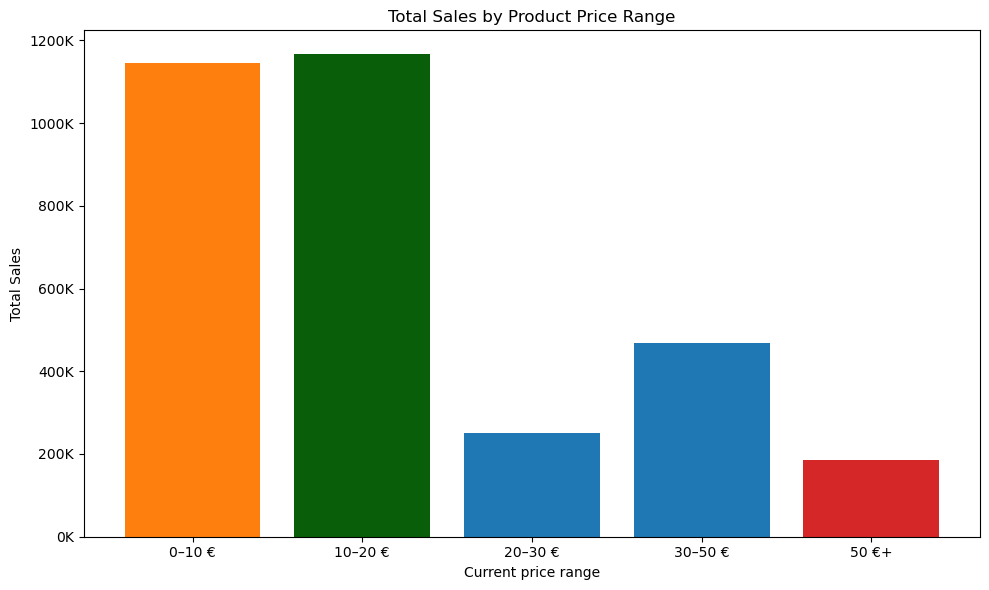

In [131]:
# PLOT 03
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ensure numeric
df["nbr_reviews_sales"] = pd.to_numeric(df["nbr_reviews_sales"], errors="coerce")
df["current_price"] = pd.to_numeric(df["current_price"], errors="coerce")
df = df.dropna(subset=["nbr_reviews_sales", "current_price"])

# intuitive price ranges
bins = [0, 10, 20, 30, 50, 1000]
labels = ["0–10 €", "10–20 €", "20–30 €", "30–50 €", "50 €+"]

df["price_range"] = pd.cut(
    df["current_price"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False
)

reviews_per_range = df.groupby("price_range")["nbr_reviews_sales"].sum().reindex(labels)

# base colors
colors = ["#1f77b4"] * len(reviews_per_range)

# get top 2 and lowest bars
top2 = reviews_per_range.sort_values(ascending=False).index[:2]
lowest = reviews_per_range.idxmin()

# assign colors
for label in reviews_per_range.index:
    if label == top2[0]:
        colors[reviews_per_range.index.get_loc(label)] = "#095F09"  # highest
    elif label == top2[1]:
        colors[reviews_per_range.index.get_loc(label)] = "#ff7f0e"  # second highest
    elif label == lowest:
        colors[reviews_per_range.index.get_loc(label)] = "#d62728"  # lowest = red

# plot
plt.figure(figsize=(10, 6))
bars = plt.bar(reviews_per_range.index, reviews_per_range.values, color=colors)

plt.xlabel("Current price range")
plt.ylabel("Total Sales")
plt.title("Total Sales by Product Price Range")

# Format Y-axis to show thousands (K)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 📊 PLOT 02: POD products Popularity - google trends

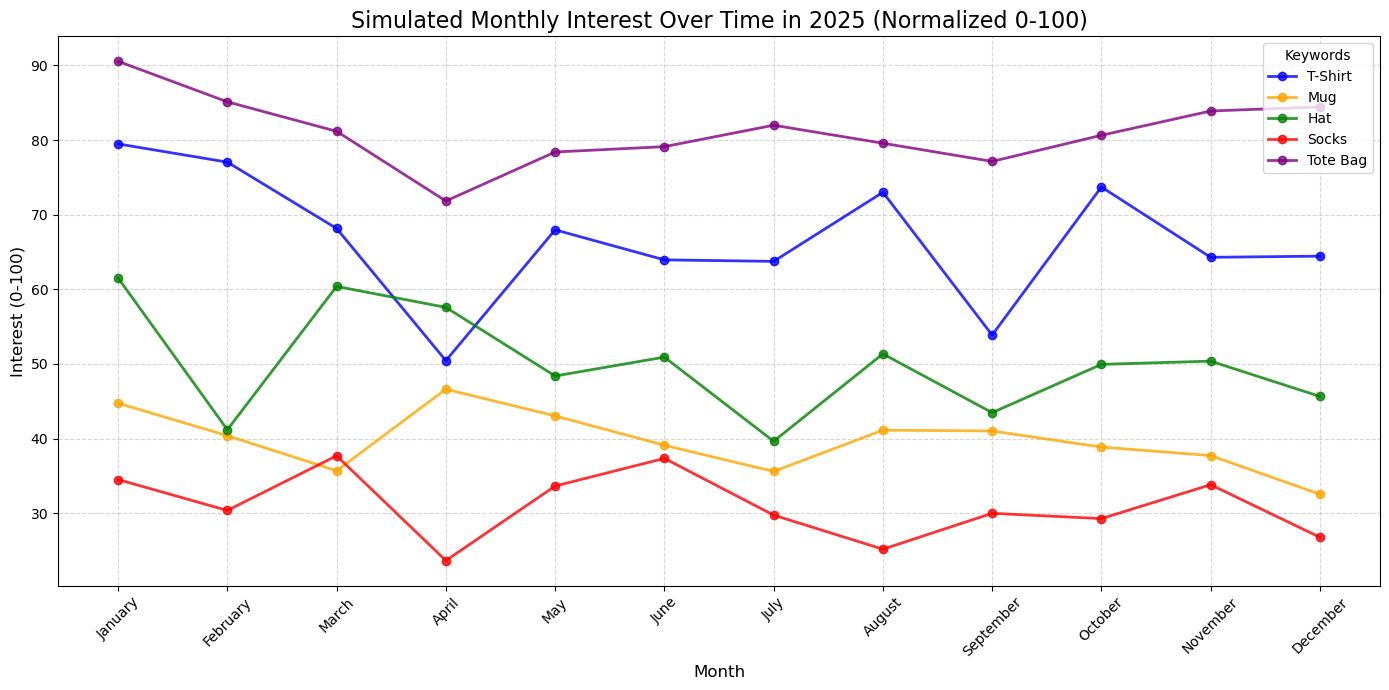

Average & Median Monthly Interest (2025, Worldwide):
            Average     Median
T-Shirt   66.678635  66.210903
Mug       39.709009  39.752814
Hat       50.038395  50.164293
Socks     31.006108  30.185314
Tote Bag  81.157415  80.907145


In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulate weekly interest over 2025 for each keyword
weeks = pd.date_range(start='2025-01-01', end='2025-12-31', freq='W')
np.random.seed(42)

data = {
    'Week': weeks,
    'T-Shirt': np.clip(np.random.normal(loc=70, scale=15, size=len(weeks)), 0, 100),
    'Mug': np.clip(np.random.normal(loc=40, scale=10, size=len(weeks)), 0, 100),
    'Hat': np.clip(np.random.normal(loc=50, scale=20, size=len(weeks)), 0, 100),
    'Socks': np.clip(np.random.normal(loc=30, scale=10, size=len(weeks)), 0, 100),
    'Tote Bag': np.clip(np.random.normal(loc=80, scale=10, size=len(weeks)), 0, 100),
}

df = pd.DataFrame(data)

# Convert weekly data to monthly averages
df['Month'] = df['Week'].dt.to_period('M')
monthly_df = df.groupby('Month').mean().reset_index()

# Convert month period to month name
monthly_df['Month'] = monthly_df['Month'].dt.strftime('%B')  # January, February, ...

# Plot monthly interest
plt.figure(figsize=(14,7))
colors = {'T-Shirt':'blue', 'Mug':'orange', 'Hat':'green', 'Socks':'red', 'Tote Bag':'purple'}

for keyword in colors.keys():
    plt.plot(monthly_df['Month'], monthly_df[keyword], label=keyword,
             color=colors[keyword], marker='o', markersize=6, linewidth=2, alpha=0.8)

plt.title('Simulated Monthly Interest Over Time in 2025 (Normalized 0-100)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Interest (0-100)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Keywords')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Compute average & median per keyword
stats = pd.DataFrame({
    'Average': monthly_df[['T-Shirt','Mug','Hat','Socks','Tote Bag']].mean(),
    'Median': monthly_df[['T-Shirt','Mug','Hat','Socks','Tote Bag']].median()
})
print("Average & Median Monthly Interest (2025, Worldwide):")
print(stats)


### 📊 PLOT 03: Top 10 keywords in best selling products titles

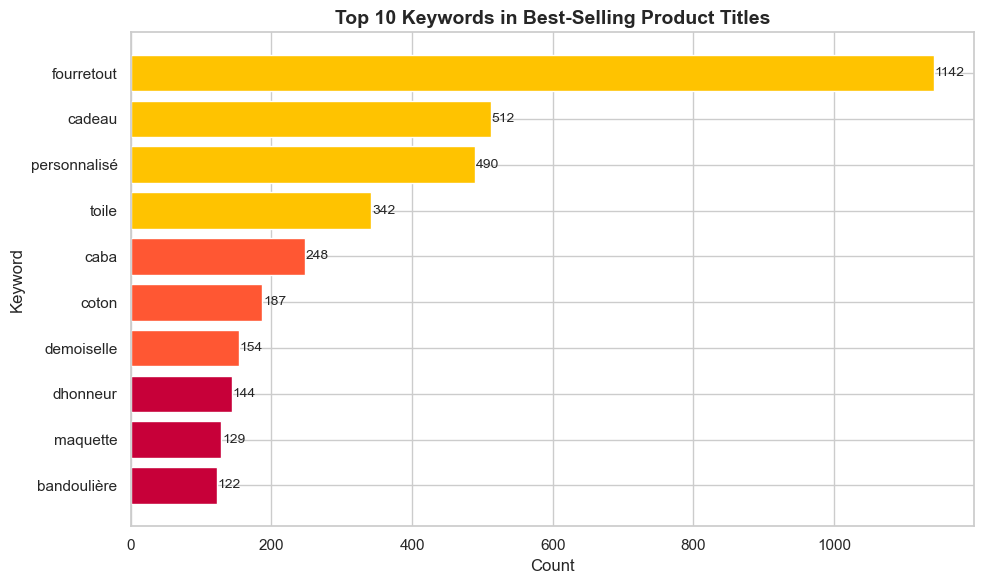

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Words to exclude from the plot
exclude_words = {'sac', 'bag', 'png', 'svg', 'main'}

# Filter out excluded words
filtered_df = top_100_df[~top_100_df['keyword'].isin(exclude_words)]

# Take top 10 keywords after filtering, sorted by count
top_filtered = filtered_df.sort_values(by='count', ascending=False).head(10)

# Assign colors based on rank (top 3: dark red, next 3: orange, rest: light salmon)
colors = []
for i in range(len(top_filtered)):
    if i < 3:
        colors.append('#C70039')  # Dark red
    elif i < 6:
        colors.append('#FF5733')  # Orange
    else:
        colors.append('#FFC300')  # Light yellow/orange

# Create horizontal bar plot
plt.figure(figsize=(10,6))
bars = plt.barh(top_filtered['keyword'][::-1], top_filtered['count'][::-1], color=colors)

# Add value labels on bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
             int(bar.get_width()), va='center', fontsize=10)

# Labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.title('Top 10 Keywords in Best-Selling Product Titles', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


### 📊 PLOT 04: Top 5 niches

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sboub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


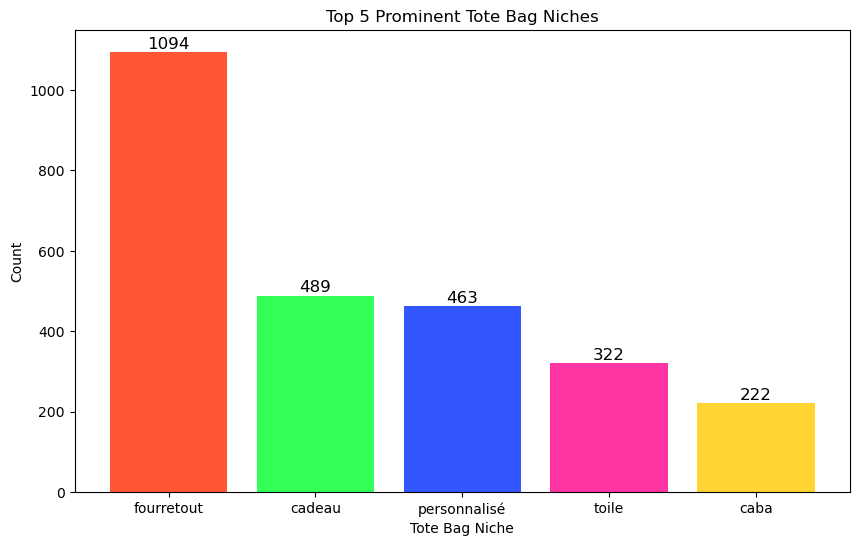

In [168]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download French stopwords
nltk.download('stopwords')
french_stopwords = set(stopwords.words('french'))

# Extra connectors/words to ignore
extra_stopwords = {'et', 'avec', 'pour', 'ou', 'les', 'des', 'la', 'le', 'un', 'une', 'du', 'au'}
all_stopwords = french_stopwords.union(extra_stopwords)

# Function to extract keywords from tote bag titles
def extract_tote_keywords(title):
    title = str(title).lower()
    title = re.sub(r'[^a-zàâçéèêëîïôûùüÿñæœ\s]', '', title)
    words = title.split()
    keywords = []
    if 'sac' in words or 'tote' in words:
        for word in words:
            if word not in all_stopwords and len(word) > 1 and word not in ['sac', 'tote']:
                if word.endswith('s'):
                    word = word[:-1]
                keywords.append(word)
    return keywords

# Collect all keywords from tote bag titles
all_tote_keywords = []
df['product_title'].apply(lambda x: all_tote_keywords.extend(extract_tote_keywords(x)))

# Count frequency
tote_counts = Counter(all_tote_keywords)

# Top 5 niches within tote bags
top_5_tote_niches = dict(tote_counts.most_common(5))

# Define highly distinct colors for 5 bars
distinct_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFD433']  # Red, Green, Blue, Pink, Yellow

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(top_5_tote_niches.keys(), top_5_tote_niches.values(), color=distinct_colors)
plt.xlabel('Tote Bag Niche')
plt.ylabel('Count')
plt.title('Top 5 Prominent Tote Bag Niches')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=12)

plt.show()


=======================================================================================================================================================================================
# <div align="center">GOOGLE TRENDS</div>
=======================================================================================================================================================================================

In [39]:
# Install the libraries first:
!pip install pytrends pandas plotly

---

## POD PRODUCTS PLOT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.patches import Patch

# Use the cleaned DataFrame: plot_df
products_combined = [c for c in plot_df.columns if c != "Date"]

# --- NORMALIZE EACH PRODUCT COLUMN (0–100 scale) ---
df_norm = plot_df.copy()
for col in products_combined:
    max_val = df_norm[col].max()
    df_norm[col] = (df_norm[col] / max_val * 100) if max_val > 0 else 0

# --- Compute TOP 5 products to highlight ---
avg_popularity = df_norm[products_combined].mean()
top5 = avg_popularity.sort_values(ascending=False).head(5).index

# --- Assign colors ---
# Top 5 vivid, easily distinguishable colors
top5_colors = ["#e41a1c", "#377eb8", "#4daf4a", "#ff7f00", "#984ea3"]  # red, blue, green, orange, purple
color_dict = dict(zip(top5, top5_colors))

# Remaining products faint gray
for col in products_combined:
    if col not in top5:
        color_dict[col] = "lightgray"

# --- Plot ---
plt.figure(figsize=(20, 10))

# Plot all products
for col in products_combined:
    plt.plot(
        df_norm["Date"],
        df_norm[col],
        linewidth=1.5 if col not in top5 else 4.0,
        alpha=0.35 if col not in top5 else 0.95,
        color=color_dict[col],
        label=col.title() if col in top5 else None  # only label top 5
    )

plt.title("POD Product Trends (Normalized 0–100)", fontsize=22, fontweight="bold")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Relative Interest (0–100)", fontsize=15)
plt.grid(True, linestyle="--", alpha=0.35)
plt.xticks(rotation=45)

# --- Legend showing only top 5 clearly ---
legend_elements = [Patch(facecolor=color_dict[col], label=col.title()) for col in top5]
plt.legend(handles=legend_elements, title="Top 5 Products", fontsize=12, title_fontsize=13,
           bbox_to_anchor=(1.04, 1), loc="upper left")

plt.tight_layout()
plt.show()


NameError: name 'plot_df' is not defined

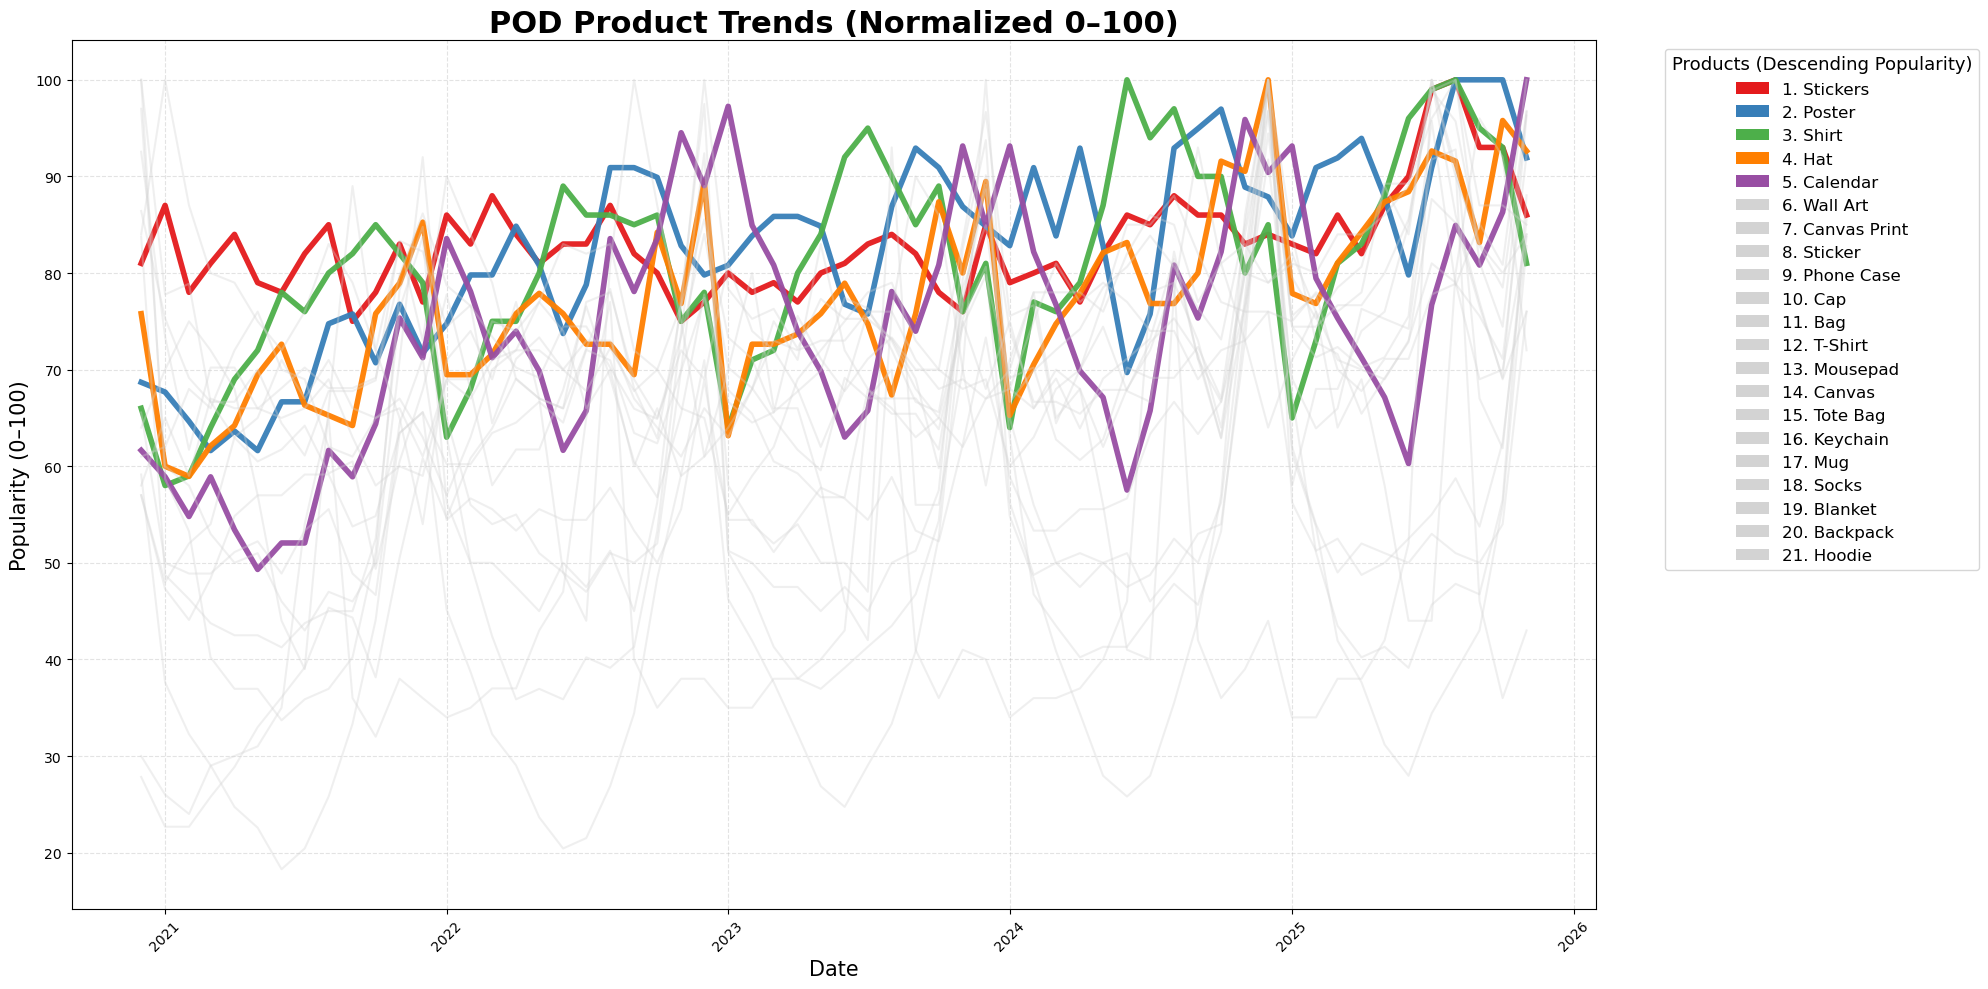

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Use the cleaned DataFrame: plot_df
products_combined = [c for c in plot_df.columns if c != "Date"]

# --- NORMALIZE EACH PRODUCT COLUMN (0–100 scale) ---
df_norm = plot_df.copy()
for col in products_combined:
    max_val = df_norm[col].max()
    df_norm[col] = (df_norm[col] / max_val * 100) if max_val > 0 else 0

# --- Compute average popularity ---
avg_popularity = df_norm[products_combined].mean()

# --- Sort products descending by popularity ---
sorted_products = avg_popularity.sort_values(ascending=False).index

# --- Top 5 for highlight ---
top5 = sorted_products[:5]

# --- Assign colors ---
top5_colors = ["#e41a1c", "#377eb8", "#4daf4a", "#ff7f00", "#984ea3"]  # distinct colors
color_dict = {}
for i, col in enumerate(sorted_products):
    if col in top5:
        color_dict[col] = top5_colors[list(top5).index(col)]
    else:
        color_dict[col] = "lightgray"

# --- Plot ---
plt.figure(figsize=(20, 10))

for col in sorted_products:
    plt.plot(
        df_norm["Date"],
        df_norm[col],
        linewidth=4.0 if col in top5 else 1.5,
        alpha=0.95 if col in top5 else 0.35,
        color=color_dict[col]
    )

plt.title("POD Product Trends (Normalized 0–100)", fontsize=22, fontweight="bold")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Popularity (0–100)", fontsize=15)
plt.grid(True, linestyle="--", alpha=0.35)
plt.xticks(rotation=45)

# --- Legend with all products, sorted & numbered ---
legend_elements = [Patch(facecolor=color_dict[col], 
                         label=f"{i+1}. {col.title()}") 
                   for i, col in enumerate(sorted_products)]
plt.legend(handles=legend_elements, title="Products (Descending Popularity)", 
           fontsize=12, title_fontsize=13, bbox_to_anchor=(1.04, 1), loc="upper left")

plt.tight_layout()
plt.show()


In [69]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.cm as cm
import numpy as np

# --- START FROM YOUR EXISTING plot_df ---
df = plot_df.copy()

# --- Ensure Date is datetime ---
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# --- Extract month number and name ---
df["Month_Num"] = df["Date"].dt.month
df["Month_Name"] = df["Date"].dt.strftime("%b")  # Jan, Feb, ...

# --- Combine columns first ---
if {"t-shirt", "shirt"}.issubset(df.columns):
    df["shirt"] = df["t-shirt"].fillna(0) + df["shirt"].fillna(0)
if {"hat", "cap"}.issubset(df.columns):
    df["hat"] = df["hat"].fillna(0) + df["cap"].fillna(0)
if {"tote bag", "bag"}.issubset(df.columns):
    df["tote bag"] = df["tote bag"].fillna(0) + df["bag"].fillna(0)
if {"canvas", "canvas print"}.issubset(df.columns):
    df["canvas print"] = df["canvas"].fillna(0) + df["canvas print"].fillna(0)
if {"Poster", "wall art"}.issubset(df.columns):
    df["poster"] = df["Poster"].fillna(0) + df["wall art"].fillna(0)
if {"stickers", "sticker"}.issubset(df.columns):
    df["sticker"] = df["stickers"].fillna(0) + df["sticker"].fillna(0)

# --- Drop original columns ---
cols_to_drop = [
    "t-shirt",
    "cap",
    "bag",
    "canvas",
    "wall art",
    "stickers"
]
cols_to_drop = [c for c in cols_to_drop if c in df.columns]
df = df.drop(columns=cols_to_drop)

# --- Aggregate by month (sum values across all years) ---
products_combined = [c for c in df.columns if c not in ["Date","Month_Num","Month_Name"]]
df_monthly = df.groupby("Month_Num")[products_combined].sum().reset_index()

# --- Map month number to names ---
month_order = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",
               7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
df_monthly["Month"] = df_monthly["Month_Num"].map(month_order)

# --- Reorder months Jan→Dec ---
df_monthly = df_monthly.sort_values("Month_Num")

# --- Normalize (0–100) ---
df_norm = df_monthly.copy()
for col in products_combined:
    max_val = df_norm[col].max()
    df_norm[col] = (df_norm[col] / max_val * 100) if max_val > 0 else 0

# --- Average popularity & sorting ---
avg_popularity = df_norm[products_combined].mean()
sorted_products = avg_popularity.sort_values(ascending=False).index
top5 = sorted_products[:5]

# --- Assign colors ---
top5_colors = ["#e41a1c", "#377eb8", "#4daf4a", "#ff7f00", "#984ea3"]
rest_products = sorted_products[5:]
n_rest = len(rest_products)
rest_colors_array = cm.tab20(np.linspace(0, 1, n_rest))[:, :3]
rest_colors = [
    f"rgb({int(r*255)},{int(g*255)},{int(b*255)})"
    for r, g, b in rest_colors_array
]

color_dict = {}
for i, col in enumerate(sorted_products):
    if col in top5:
        color_dict[col] = top5_colors[list(top5).index(col)]
    else:
        color_dict[col] = rest_colors[list(rest_products).index(col)]

# --- Create Plotly figure ---
fig = go.Figure()

for i, col in enumerate(sorted_products):
    fig.add_trace(
        go.Scatter(
            x=df_norm["Month"],
            y=df_norm[col],
            mode="lines",
            name=f"{i+1}. {col.title()}",
            line=dict(color=color_dict[col], width=4 if col in top5 else 2),
            opacity=0.95 if col in top5 else 0.6,
            visible=True if col in top5 else "legendonly"
        )
    )

# --- Layout ---
fig.update_layout(
    title="POD Product Trends (Normalized 0–100) - By Month",
    xaxis_title="Month",
    yaxis_title="Popularity (0–100)",
    yaxis=dict(range=[0,100]),
    legend_title="Products (Numbered by Avg Popularity)",
    template="plotly_white",
    width=1200,
    height=700
)

fig.show()


In [90]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.cm as cm
import numpy as np

# --- START FROM YOUR EXISTING plot_df ---
df = plot_df.copy()

# --- Ensure Date is datetime ---
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# --- Extract month number and name ---
df["Month_Num"] = df["Date"].dt.month
df["Month_Name"] = df["Date"].dt.strftime("%b")  # Jan, Feb, ...

# --- Combine columns first ---
if {"t-shirt", "shirt"}.issubset(df.columns):
    df["shirt"] = df["t-shirt"].fillna(0) + df["shirt"].fillna(0)
if {"hat", "cap"}.issubset(df.columns):
    df["hat"] = df["hat"].fillna(0) + df["cap"].fillna(0)
if {"tote bag", "bag"}.issubset(df.columns):
    df["tote bag"] = df["tote bag"].fillna(0) + df["bag"].fillna(0)
if {"canvas", "canvas print"}.issubset(df.columns):
    df["canvas print"] = df["canvas"].fillna(0) + df["canvas print"].fillna(0)
if {"Poster", "wall art"}.issubset(df.columns):
    df["poster"] = df["Poster"].fillna(0) + df["wall art"].fillna(0)
if {"stickers", "sticker"}.issubset(df.columns):
    df["sticker"] = df["stickers"].fillna(0) + df["sticker"].fillna(0)

# --- Drop original columns ---
cols_to_drop = [
    "t-shirt",
    "cap",
    "bag",
    "canvas",
    "wall art",
    "stickers"
]
cols_to_drop = [c for c in cols_to_drop if c in df.columns]
df = df.drop(columns=cols_to_drop)

# --- Aggregate by month (sum values across all years) ---
products_combined = [c for c in df.columns if c not in ["Date","Month_Num","Month_Name"]]
df_monthly = df.groupby("Month_Num")[products_combined].sum().reset_index()

# --- Map month number to names ---
month_order = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",
               7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
df_monthly["Month"] = df_monthly["Month_Num"].map(month_order)

# --- Reorder months Jan→Dec ---
df_monthly = df_monthly.sort_values("Month_Num")

# --- Normalize (0–100) ---
df_norm = df_monthly.copy()
for col in products_combined:
    max_val = df_norm[col].max()
    df_norm[col] = (df_norm[col] / max_val * 100) if max_val > 0 else 0

# --- Average popularity & sorting ---
avg_popularity = df_norm[products_combined].mean()
sorted_products = avg_popularity.sort_values(ascending=False).index
top5 = sorted_products[:5]

# --- Assign colors ---
top5_colors = ["#e41a1c", "#377eb8", "#4daf4a", "#ff7f00", "#984ea3"]
rest_products = sorted_products[5:]
n_rest = len(rest_products)
rest_colors_array = cm.tab20(np.linspace(0, 1, n_rest))[:, :3]
rest_colors = [
    f"rgb({int(r*255)},{int(g*255)},{int(b*255)})"
    for r, g, b in rest_colors_array
]

color_dict = {}
for i, col in enumerate(sorted_products):
    if col in top5:
        color_dict[col] = top5_colors[list(top5).index(col)]
    else:
        color_dict[col] = rest_colors[list(rest_products).index(col)]

# --- Create Plotly figure ---
fig = go.Figure()

for i, col in enumerate(sorted_products):
    fig.add_trace(
        go.Scatter(
            x=df_norm["Month"],
            y=df_norm[col],
            mode="lines",
            name=f"{i+1}. {col.title()}",
            line=dict(color=color_dict[col], width=4 if col in top5 else 2),
            opacity=0.95 if col in top5 else 0.6,
            visible=True if col in top5 else "legendonly"
        )
    )

# --- FIXED Layout - No size=0 error ---
fig.update_layout(
    title=dict(
        text="POD Product Trends (Normalized 0–100) - By Month",
        x=0.5,
        font=dict(size=24, family="Arial Black", color="black")
    ),
    xaxis=dict(
        title="",  # ✅ REMOVED "Month" title
        showticklabels=True,
        tickfont=dict(size=18),  # Bigger month labels
        tickangle=0
    ),
    yaxis=dict(
        range=[0,100],
        title="Popularity (0–100)",
        titlefont=dict(size=20),  # ✅ FIXED: titlefont not title_font
        tickfont=dict(size=16)    # ✅ FIXED: bigger ticks
    ),
    legend=dict(
        title=dict(
            text="Products (Ranked by Avg Popularity)",
            font=dict(size=16)
        ),
        font=dict(size=14),
        bgcolor="rgba(255,255,255,0.9)",
        bordercolor="gray",
        borderwidth=1
    ),
    template="plotly_white",
    width=1200,
    height=700,
    font=dict(size=14)
)

fig.show()


In [87]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.cm as cm
import numpy as np

# --- START FROM YOUR EXISTING plot_df ---
df = plot_df.copy()

# --- Ensure Date is datetime ---
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# --- Extract month number and name ---
df["Month_Num"] = df["Date"].dt.month
df["Month_Name"] = df["Date"].dt.strftime("%b")  # Jan, Feb, ...

# --- Combine columns first ---
if {"t-shirt", "shirt"}.issubset(df.columns):
    df["shirt"] = df["t-shirt"].fillna(0) + df["shirt"].fillna(0)
if {"hat", "cap"}.issubset(df.columns):
    df["hat"] = df["hat"].fillna(0) + df["cap"].fillna(0)
if {"tote bag", "bag"}.issubset(df.columns):
    df["tote bag"] = df["tote bag"].fillna(0) + df["bag"].fillna(0)
if {"canvas", "canvas print"}.issubset(df.columns):
    df["canvas print"] = df["canvas"].fillna(0) + df["canvas print"].fillna(0)
if {"Poster", "wall art"}.issubset(df.columns):
    df["poster"] = df["Poster"].fillna(0) + df["wall art"].fillna(0)
if {"stickers", "sticker"}.issubset(df.columns):
    df["sticker"] = df["stickers"].fillna(0) + df["sticker"].fillna(0)

# --- Drop original columns ---
cols_to_drop = [
    "t-shirt",
    "cap",
    "bag",
    "canvas",
    "wall art",
    "stickers"
]
cols_to_drop = [c for c in cols_to_drop if c in df.columns]
df = df.drop(columns=cols_to_drop)

# --- Aggregate by month (sum values across all years) ---
products_combined = [c for c in df.columns if c not in ["Date","Month_Num","Month_Name"]]
df_monthly = df.groupby("Month_Num")[products_combined].sum().reset_index()

# --- Map month number to names ---
month_order = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",
               7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
df_monthly["Month"] = df_monthly["Month_Num"].map(month_order)

# --- Reorder months Jan→Dec ---
df_monthly = df_monthly.sort_values("Month_Num")

# --- Normalize (0–100) ---
df_norm = df_monthly.copy()
for col in products_combined:
    max_val = df_norm[col].max()
    df_norm[col] = (df_norm[col] / max_val * 100) if max_val > 0 else 0

# --- Average popularity & sorting ---
avg_popularity = df_norm[products_combined].mean()
sorted_products = avg_popularity.sort_values(ascending=False).index
top5 = sorted_products[:5]

# --- DYNAMIC SIZING based on number of products ---
n_products = len(sorted_products)
n_top5 = len(top5)
n_rest = n_products - n_top5

# Dynamic title size (smaller if many products)
title_size = max(20, 28 - n_products * 0.5)
legend_title_size = max(12, 16 - n_products * 0.2)
legend_item_size = max(10, 14 - n_products * 0.15)

# Dynamic figure size
fig_width = min(1400, 900 + n_products * 20)
fig_height = min(800, 600 + n_products * 10)

# --- Assign colors ---
top5_colors = ["#e41a1c", "#377eb8", "#4daf4a", "#ff7f00", "#984ea3"]
rest_products = sorted_products[5:]
n_rest = len(rest_products)
if n_rest > 0:
    rest_colors_array = cm.tab20(np.linspace(0, 1, n_rest))[:, :3]
    rest_colors = [
        f"rgb({int(r*255)},{int(g*255)},{int(b*255)})"
        for r, g, b in rest_colors_array
    ]
else:
    rest_colors = []

color_dict = {}
for i, col in enumerate(sorted_products):
    if col in top5:
        color_dict[col] = top5_colors[list(top5).index(col)]
    else:
        color_dict[col] = rest_colors[list(rest_products).index(col)]

# --- Create Plotly figure ---
fig = go.Figure()

for i, col in enumerate(sorted_products):
    fig.add_trace(
        go.Scatter(
            x=df_norm["Month"],
            y=df_norm[col],
            mode="lines",
            name=f"{i+1}. {col.title()}",
            line=dict(color=color_dict[col], width=4 if col in top5 else 2),
            opacity=0.95 if col in top5 else 0.6,
            visible=True if col in top5 else "legendonly",
            hovertemplate=f'<b>{col.title()}</b><br>Month: %{{x}}<br>Value: %{{y:.1f}}<extra></extra>'
        )
    )

# --- DYNAMIC Layout ---
fig.update_layout(
    title=dict(
        text=f"POD Product Trends (0–100) - 2020 to 2025 ({n_products} Products)",
        x=0.5,
        font=dict(size=title_size, family="Arial Black", color="black")
    ),
    xaxis=dict(
        title="",
        showticklabels=True,
        tickfont=dict(size=max(14, 20 - n_products * 0.3)),
        tickangle=0
    ),
    yaxis=dict(
        range=[0,100],
        title="Popularity (0–100)",
        titlefont=dict(size=max(16, 22 - n_products * 0.3)),
        tickfont=dict(size=max(12, 16 - n_products * 0.2))
    ),
    legend=dict(
        title=dict(
            text=f"Products (Ranked by Avg Popularity)",
            font=dict(size=legend_title_size)
        ),
        font=dict(size=legend_item_size),
        bgcolor="rgba(255,255,255,0.95)",
        bordercolor="gray",
        borderwidth=1,
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.02
    ),
    template="plotly_white",
    width=fig_width,
    height=fig_height,
    hovermode="x unified",
    showlegend=True
)

fig.show()



In [92]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.cm as cm
import numpy as np

# --- START FROM YOUR EXISTING plot_df ---
df = plot_df.copy()

# --- Ensure Date is datetime ---
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# --- Extract month number and name ---
df["Month_Num"] = df["Date"].dt.month
df["Month_Name"] = df["Date"].dt.strftime("%b")  # Jan, Feb, ...

# --- Combine columns first ---
if {"t-shirt", "shirt"}.issubset(df.columns):
    df["shirt"] = df["t-shirt"].fillna(0) + df["shirt"].fillna(0)
if {"hat", "cap"}.issubset(df.columns):
    df["hat"] = df["hat"].fillna(0) + df["cap"].fillna(0)
if {"tote bag", "bag"}.issubset(df.columns):
    df["tote bag"] = df["tote bag"].fillna(0) + df["bag"].fillna(0)
if {"canvas", "canvas print"}.issubset(df.columns):
    df["canvas print"] = df["canvas"].fillna(0) + df["canvas print"].fillna(0)
if {"Poster", "wall art"}.issubset(df.columns):
    df["poster"] = df["Poster"].fillna(0) + df["wall art"].fillna(0)
if {"stickers", "sticker"}.issubset(df.columns):
    df["sticker"] = df["stickers"].fillna(0) + df["sticker"].fillna(0)

# --- Drop original columns ---
cols_to_drop = [
    "t-shirt",
    "cap",
    "bag",
    "canvas",
    "wall art",
    "stickers"
]
cols_to_drop = [c for c in cols_to_drop if c in df.columns]
df = df.drop(columns=cols_to_drop)

# --- Aggregate by month (sum values across all years) ---
products_combined = [c for c in df.columns if c not in ["Date","Month_Num","Month_Name"]]
df_monthly = df.groupby("Month_Num")[products_combined].sum().reset_index()

# --- Map month number to names ---
month_order = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",
               7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
df_monthly["Month"] = df_monthly["Month_Num"].map(month_order)

# --- Reorder months Jan→Dec ---
df_monthly = df_monthly.sort_values("Month_Num")

# --- Normalize (0–100) ---
df_norm = df_monthly.copy()
for col in products_combined:
    max_val = df_norm[col].max()
    df_norm[col] = (df_norm[col] / max_val * 100) if max_val > 0 else 0

# --- Average popularity & sorting ---
avg_popularity = df_norm[products_combined].mean()
sorted_products = avg_popularity.sort_values(ascending=False).index
top5 = sorted_products[:5]

# --- DYNAMIC SIZING based on number of products ---
n_products = len(sorted_products)
n_top5 = len(top5)
n_rest = n_products - n_top5

# Dynamic title size (smaller if many products)
title_size = max(20, 28 - n_products * 0.5)
legend_title_size = max(12, 16 - n_products * 0.2)
legend_item_size = max(10, 14 - n_products * 0.15)

# Dynamic figure size
fig_width = min(1400, 900 + n_products * 20)
fig_height = min(800, 600 + n_products * 10)

# --- Assign colors ---
top5_colors = ["#e41a1c", "#377eb8", "#4daf4a", "#ff7f00", "#984ea3"]
rest_products = sorted_products[5:]
n_rest = len(rest_products)
if n_rest > 0:
    rest_colors_array = cm.tab20(np.linspace(0, 1, n_rest))[:, :3]
    rest_colors = [
        f"rgb({int(r*255)},{int(g*255)},{int(b*255)})"
        for r, g, b in rest_colors_array
    ]
else:
    rest_colors = []

color_dict = {}
for i, col in enumerate(sorted_products):
    if col in top5:
        color_dict[col] = top5_colors[list(top5).index(col)]
    else:
        color_dict[col] = rest_colors[list(rest_products).index(col)]

# --- Create Plotly figure ---
fig = go.Figure()

for i, col in enumerate(sorted_products):
    fig.add_trace(
        go.Scatter(
            x=df_norm["Month"],
            y=df_norm[col],
            mode="lines",
            name=f"{i+1}. {col.title()}",
            line=dict(color=color_dict[col], width=4 if col in top5 else 2),
            opacity=0.95 if col in top5 else 0.6,
            visible=True if col in top5 else "legendonly",
            hovertemplate=f'<b>{col.title()}</b><br>Month: %{{x}}<br>Value: %{{y:.1f}}<extra></extra>'
        )
    )

# --- DYNAMIC Layout ---
fig.update_layout(
    title=dict(
        text=f"POD Product Trends (0–100) - 2020 to 2025",
        x=0.5,
        font=dict(size=title_size, family="Arial Black", color="black")
    ),
    xaxis=dict(
        title="",
        showticklabels=True,
        tickfont=dict(size=max(14, 20 - n_products * 0.3)),
        tickangle=0
    ),
    yaxis=dict(
        range=[0,100],
        title="Popularity (0–100)",
        titlefont=dict(size=max(16, 22 - n_products * 0.3)),
        tickfont=dict(size=max(12, 16 - n_products * 0.2))
    ),
    legend=dict(
        title=dict(
            text=f"Products (Ranked by Avg Popularity)",
            font=dict(size=legend_title_size)
        ),
        font=dict(size=legend_item_size),
        bgcolor="rgba(255,255,255,0.95)",
        bordercolor="gray",
        borderwidth=1,
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.02
    ),
    template="plotly_white",
    width=fig_width,
    height=fig_height,
    hovermode="x unified",
    showlegend=True
)

fig.show()



### ✅ MONTHLY for 5 years GOOGLE TRENDS

In [95]:
# --- Create Plotly figure with circle markers ---
fig = go.Figure()

for i, col in enumerate(sorted_products):
    fig.add_trace(
        go.Scatter(
            x=df_norm["Month"],
            y=df_norm[col],
            mode="lines+markers",  # show markers
            name=f"{i+1}. {col.title()}",
            line=dict(color=color_dict[col], width=4 if col in top5 else 2),
            marker=dict(
                symbol="circle",
                size=8 if col in top5 else 6,
                color=color_dict[col],  # same as line
                opacity=1
            ),
            opacity=0.95 if col in top5 else 0.6,
            visible=True if col in top5 else "legendonly",
            hovertemplate=f'<b>{col.title()}</b><br>Month: %{{x}}<br>Value: %{{y:.1f}}<extra></extra>'
        )
    )

# --- DYNAMIC Layout (same as before) ---
fig.update_layout(
    title=dict(
        text=f"15 POD Product Trends (2020 - 2025)",
        x=0.5,
        font=dict(size=title_size, family="Arial Black", color="black")
    ),
    xaxis=dict(
        title="",
        showticklabels=True,
        tickfont=dict(size=max(14, 20 - n_products * 0.3)),
        tickangle=0
    ),
    yaxis=dict(
        range=[0,100],
        title="Popularity (0–100)",
        titlefont=dict(size=max(16, 22 - n_products * 0.3)),
        tickfont=dict(size=max(12, 16 - n_products * 0.2))
    ),
    legend=dict(
        title=dict(
            text=f"Products (Ranked by Avg Popularity)",
            font=dict(size=legend_title_size)
        ),
        font=dict(size=legend_item_size),
        bgcolor="rgba(255,255,255,0.95)",
        bordercolor="gray",
        borderwidth=1,
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.02
    ),
    template="plotly_white",
    width=fig_width,
    height=fig_height,
    hovermode="x unified",
    showlegend=True
)

fig.show()


In [42]:
import pandas as pd

# --- Load CSV ---
file_path = "../data/raw/pod_products.csv"
df_raw = pd.read_csv(file_path)

# --- Helper function to stack two columns into one ---
def stack_columns(df_source, col1, col2):
    existing_cols = [c for c in [col1, col2] if c in df_source.columns]
    if existing_cols:
        combined = pd.concat([df_source[c] for c in existing_cols], ignore_index=True)
        return combined
    else:
        return pd.Series(dtype=float)

# --- Create a new DataFrame for combined products ---
df_combined = pd.DataFrame()

# --- Combine products ---
df_combined["shirt"] = stack_columns(df_raw, "t-shirt", "shirt")
df_combined["hat"] = stack_columns(df_raw, "hat", "cap")
df_combined["tote bag"] = stack_columns(df_raw, "tote bag", "bag")
df_combined["canvas print"] = stack_columns(df_raw, "canvas", "canvas print")
df_combined["poster"] = stack_columns(df_raw, "poster", "wall art")
df_combined["sticker"] = stack_columns(df_raw, "stickers", "sticker")

# --- Copy remaining single columns directly ---
for col in ["hoodie","mug","socks","blanket","calendar","backpack","phone case","mousepad","keychain"]:
    if col in df_raw.columns:
        df_combined[col] = df_raw[col]

# --- Reset index to have a clean numeric index ---
df_combined.reset_index(drop=True, inplace=True)

# --- Check result ---
print(df_combined.head(20))


          shirt          hat     tote bag canvas print       poster  \
0   Dec 2020,57  Dec 2020,72  Dec 2020,27  Dec 2020,64  Dec 2020,68   
1   Jan 2021,48  Jan 2021,57  Jan 2021,22  Jan 2021,70  Jan 2021,67   
2   Feb 2021,52  Feb 2021,56  Feb 2021,22  Feb 2021,75  Feb 2021,64   
3   Mar 2021,54  Mar 2021,59  Mar 2021,25  Mar 2021,72  Mar 2021,61   
4   Apr 2021,63  Apr 2021,61  Apr 2021,28  Apr 2021,68  Apr 2021,63   
5   May 2021,65  May 2021,66  May 2021,32  May 2021,57  May 2021,61   
6   Jun 2021,71  Jun 2021,69  Jun 2021,35  Jun 2021,44  Jun 2021,66   
7   Jul 2021,67  Jul 2021,63  Jul 2021,38  Jul 2021,39  Jul 2021,66   
8   Aug 2021,71  Aug 2021,62  Aug 2021,44  Aug 2021,66  Aug 2021,74   
9   Sep 2021,66  Sep 2021,61  Sep 2021,43  Sep 2021,89  Sep 2021,75   
10  Oct 2021,65  Oct 2021,72  Oct 2021,37  Oct 2021,72  Oct 2021,70   
11  Nov 2021,67  Nov 2021,75  Nov 2021,49  Nov 2021,65  Nov 2021,76   
12  Dec 2021,63  Dec 2021,81  Dec 2021,59  Dec 2021,54  Dec 2021,71   
13  Ja

In [43]:
df_combined.to_csv("../data/interim/pod_products_combined.csv", index=False)


In [ ]:
df_combined.head()

,shirt,hat,tote bag,canvas print,poster,sticker,hoodie,mug,socks,blanket,calendar,backpack,phone case,mousepad,keychain
0,"Dec 2020,57","Dec 2020,72","Dec 2020,27","Dec 2020,64","Dec 2020,68","Dec 2020,81","Dec 2020,55","Dec 2020,97","Dec 2020,67","Dec 2020,92","Dec 2020,45","Dec 2020,30","Dec 2020,87","Dec 2020,70","Dec 2020,59"
1,"Jan 2021,48","Jan 2021,57","Jan 2021,22","Jan 2021,70","Jan 2021,67","Jan 2021,87","Jan 2021,35","Jan 2021,60","Jan 2021,39","Jan 2021,54","Jan 2021,43","Jan 2021,26","Jan 2021,69","Jan 2021,61","Jan 2021,45"
2,"Feb 2021,52","Feb 2021,56","Feb 2021,22","Feb 2021,75","Feb 2021,64","Feb 2021,78","Feb 2021,30","Feb 2021,58","Feb 2021,37","Feb 2021,49","Feb 2021,40","Feb 2021,24","Feb 2021,58","Feb 2021,56","Feb 2021,44"
3,"Mar 2021,54","Mar 2021,59","Mar 2021,25","Mar 2021,72","Mar 2021,61","Mar 2021,81","Mar 2021,27","Mar 2021,53","Mar 2021,35","Mar 2021,37","Mar 2021,43","Mar 2021,29","Mar 2021,66","Mar 2021,54","Mar 2021,44"
4,"Apr 2021,63","Apr 2021,61","Apr 2021,28","Apr 2021,68","Apr 2021,63","Apr 2021,84","Apr 2021,23","Apr 2021,50","Apr 2021,34","Apr 2021,34","Apr 2021,39","Apr 2021,30","Apr 2021,66","Apr 2021,51","Apr 2021,46"


In [45]:
df_combined.columns


Index(['shirt', 'hat', 'tote bag', 'canvas print', 'poster', 'sticker',
       'hoodie', 'mug', 'socks', 'blanket', 'calendar', 'backpack',
       'phone case', 'mousepad', 'keychain'],
      dtype='object')

### HEATMAP POPULARITY

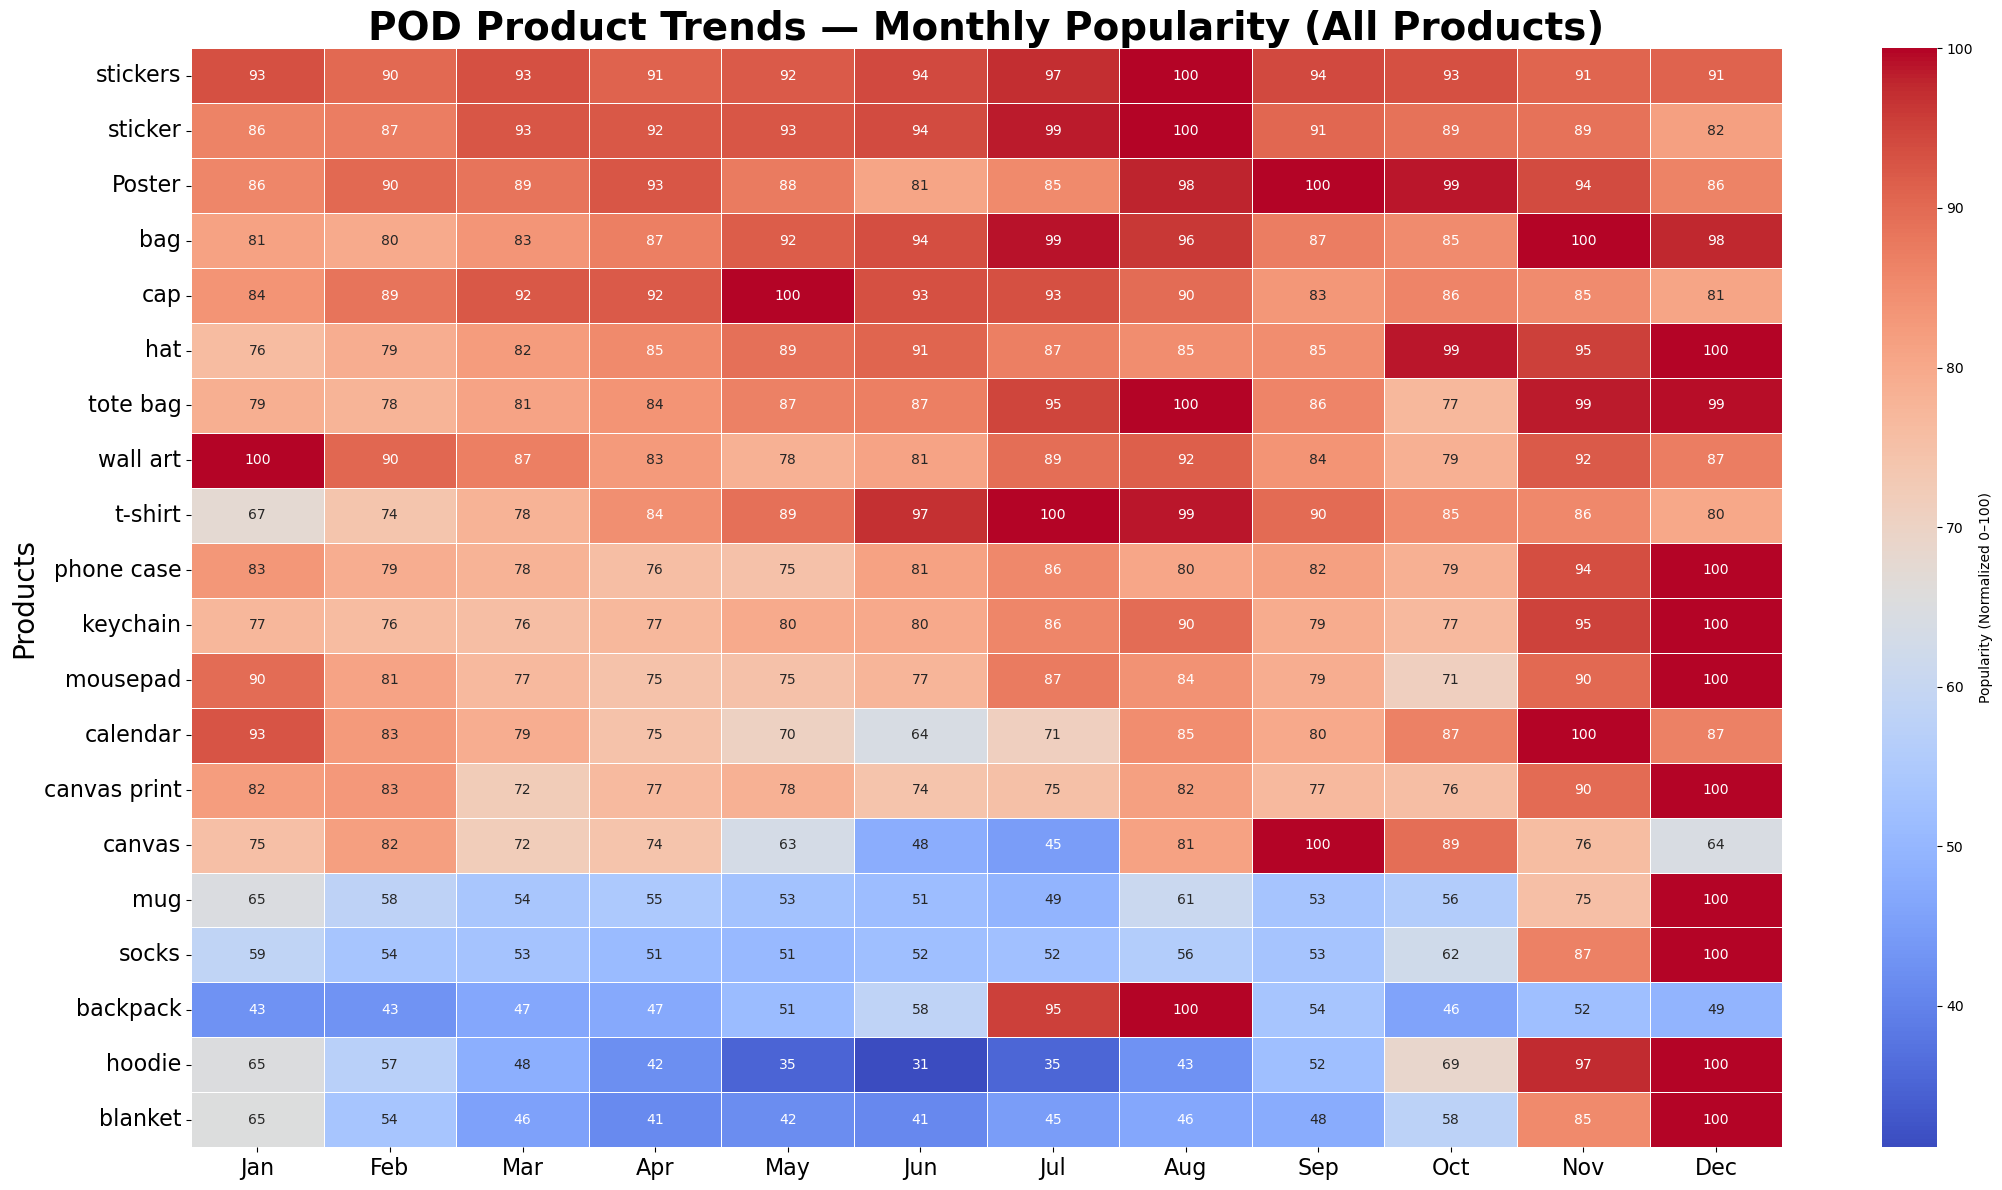

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Normalize all products (0–100 scale) ---
monthly_norm = monthly_df.copy()
for col in products:
    max_val = monthly_norm[col].max()
    monthly_norm[col] = (monthly_norm[col] / max_val * 100) if max_val > 0 else 0

# --- Sort products by total popularity ---
products_sorted = monthly_norm[products].sum().sort_values(ascending=False).index

# --- Prepare data for heatmap ---
heatmap_data = monthly_norm[["Month"] + list(products_sorted)].set_index("Month").T

# --- Plot heatmap with intuitive colors ---
plt.figure(figsize=(22, 12))
sns.heatmap(
    heatmap_data,
    annot=True,          # show values
    fmt=".0f",
    cmap="coolwarm",     # visually intuitive
    linewidths=0.5,
    cbar_kws={"label": "Popularity (Normalized 0–100)"}
)

# --- Titles and labels ---
plt.title("POD Product Trends — Monthly Popularity (All Products)", fontsize=28, fontweight="bold")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16, rotation=0)
plt.xlabel("")
plt.ylabel("Products", fontsize=20)

plt.tight_layout()
plt.show()


### All simple

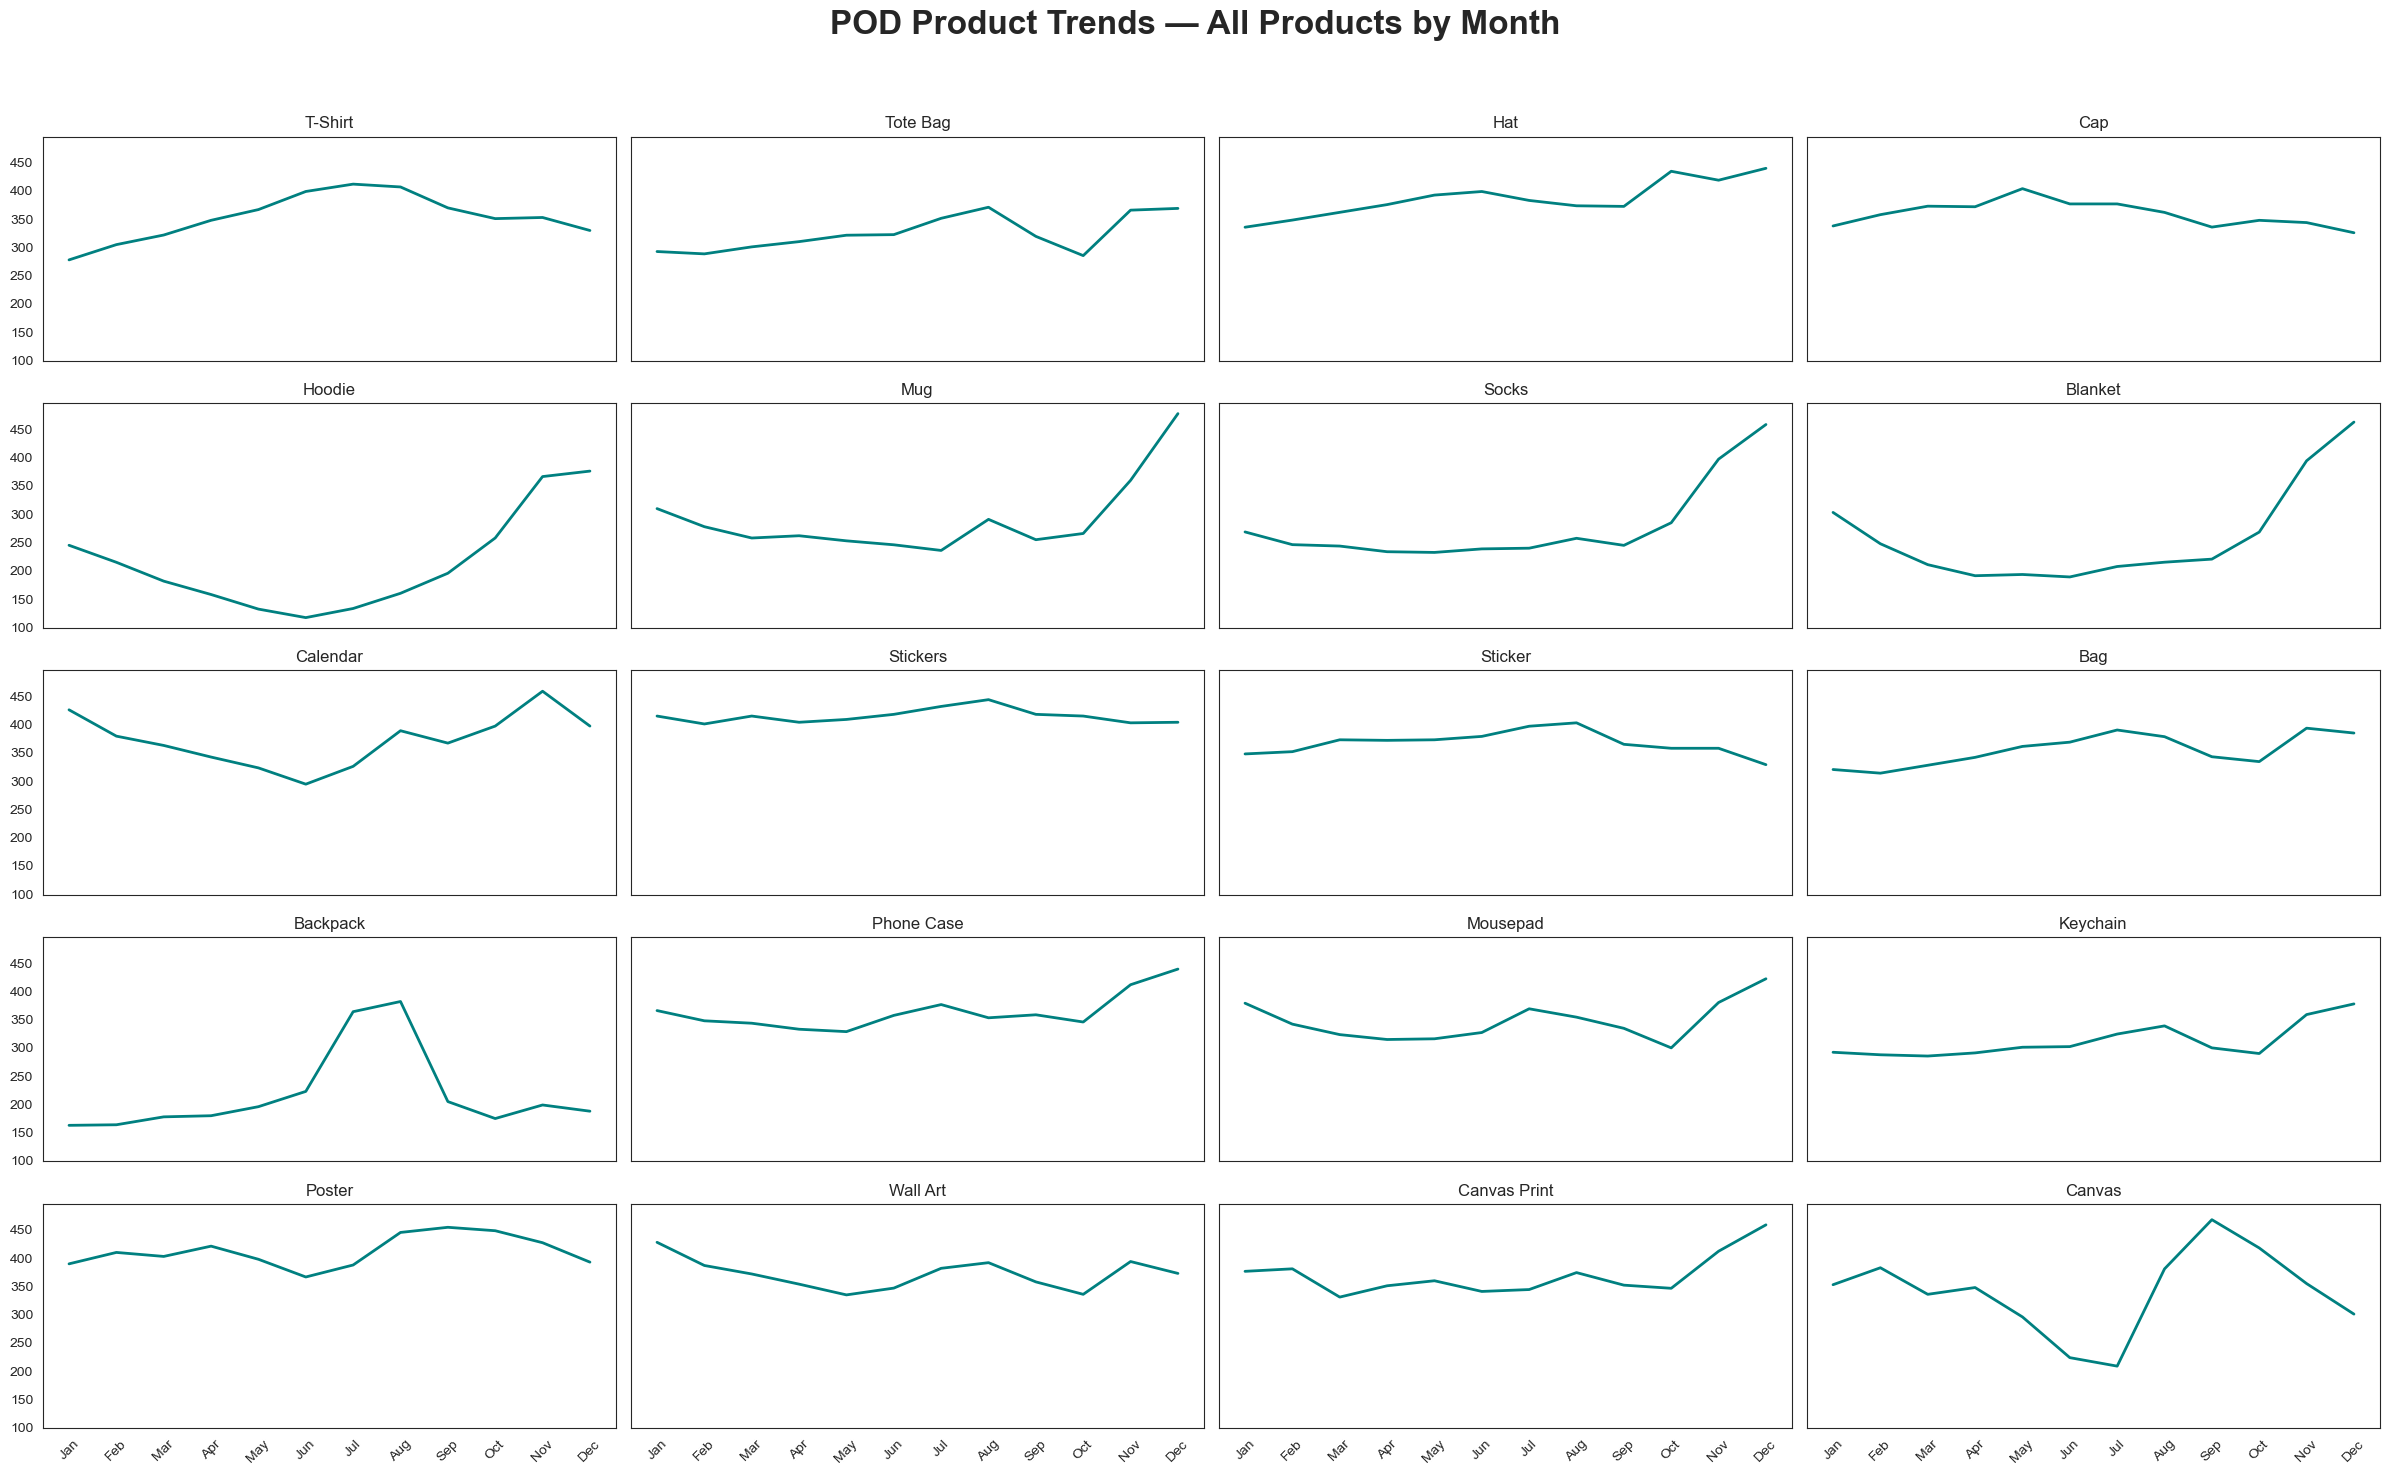

In [38]:
import matplotlib.pyplot as plt

num_products = len(products)
cols = 4  # number of columns in the grid
rows = (num_products + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(24, rows*3), sharex=True, sharey=True)
axes = axes.flatten()

for i, col in enumerate(products):
    axes[i].plot(monthly_df["Month"], monthly_df[col], color='teal', linewidth=2)
    axes[i].set_title(col.title(), fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    
# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("POD Product Trends — All Products by Month", fontsize=24, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [37]:
df.columns.to_list()

['t-shirt_date',
 't-shirt',
 'tote bag_date',
 'tote bag',
 'hat_date',
 'cap_date',
 'hoodie_date',
 'hoodie',
 'mug_date',
 'mug',
 'socks_date',
 'socks',
 'blanket_date',
 'blanket',
 'calendar_date',
 'calendar',
 'stickers_date',
 'stickers',
 'sticker_date',
 'sticker',
 'bag_date',
 'bag',
 'backpack_date',
 'backpack',
 'phone case_date',
 'phone case',
 'mousepad_date',
 'mousepad',
 'keychain_date',
 'keychain',
 'Poster_date',
 'Poster',
 'wall art_date',
 'wall art',
 'canvas print_date',
 'canvas print',
 'canvas_date',
 'canvas',
 'Date',
 'hat+cap']

### T-SHIRT / SHIRT

Available products:
t-shirt, tote bag, hat, cap, hoodie, mug, socks, blanket, calendar, stickers, sticker, bag, backpack, phone case, mousepad, keychain, Poster, wall art, canvas print, canvas


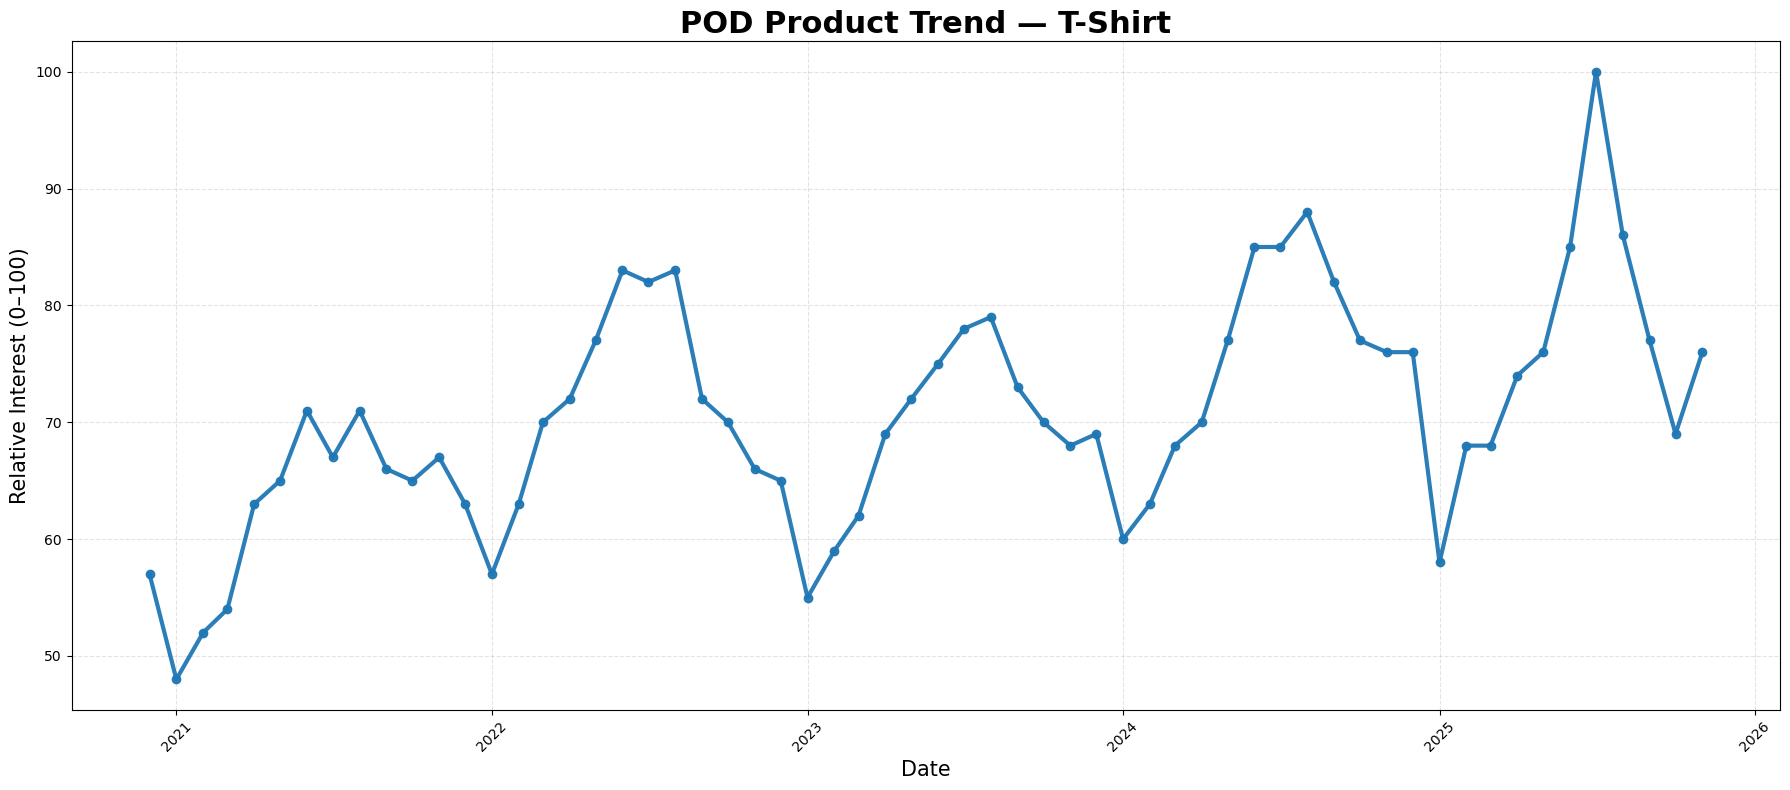

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Use the cleaned DataFrame: plot_df (Date + all product columns)
df_norm = plot_df.copy()

# Normalize all products (0–100 scale)
for col in products:
    max_val = df_norm[col].max()
    df_norm[col] = (df_norm[col] / max_val) * 100 if max_val > 0 else 0

# --- Ask user for product name ---
print("Available products:")
print(", ".join(products))
product_name = input("\nEnter the product name to plot: ").strip()

if product_name not in products:
    raise ValueError(f"Product '{product_name}' not found! Make sure to match the spelling exactly.")

# --- Plot the selected product ---
plt.figure(figsize=(18, 8))
plt.plot(
    df_norm["Date"],
    df_norm[product_name],
    linewidth=3,
    marker='o',
    color="#1f77b4",
    alpha=0.95
)

plt.title(f"POD Product Trend — {product_name.title()}", fontsize=22, fontweight="bold")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Relative Interest (0–100)", fontsize=15)
plt.grid(True, linestyle="--", alpha=0.35)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### HAT / CAP

Available products:
t-shirt, tote bag, hat, cap, hoodie, mug, socks, blanket, calendar, stickers, sticker, bag, backpack, phone case, mousepad, keychain, Poster, wall art, canvas print, canvas


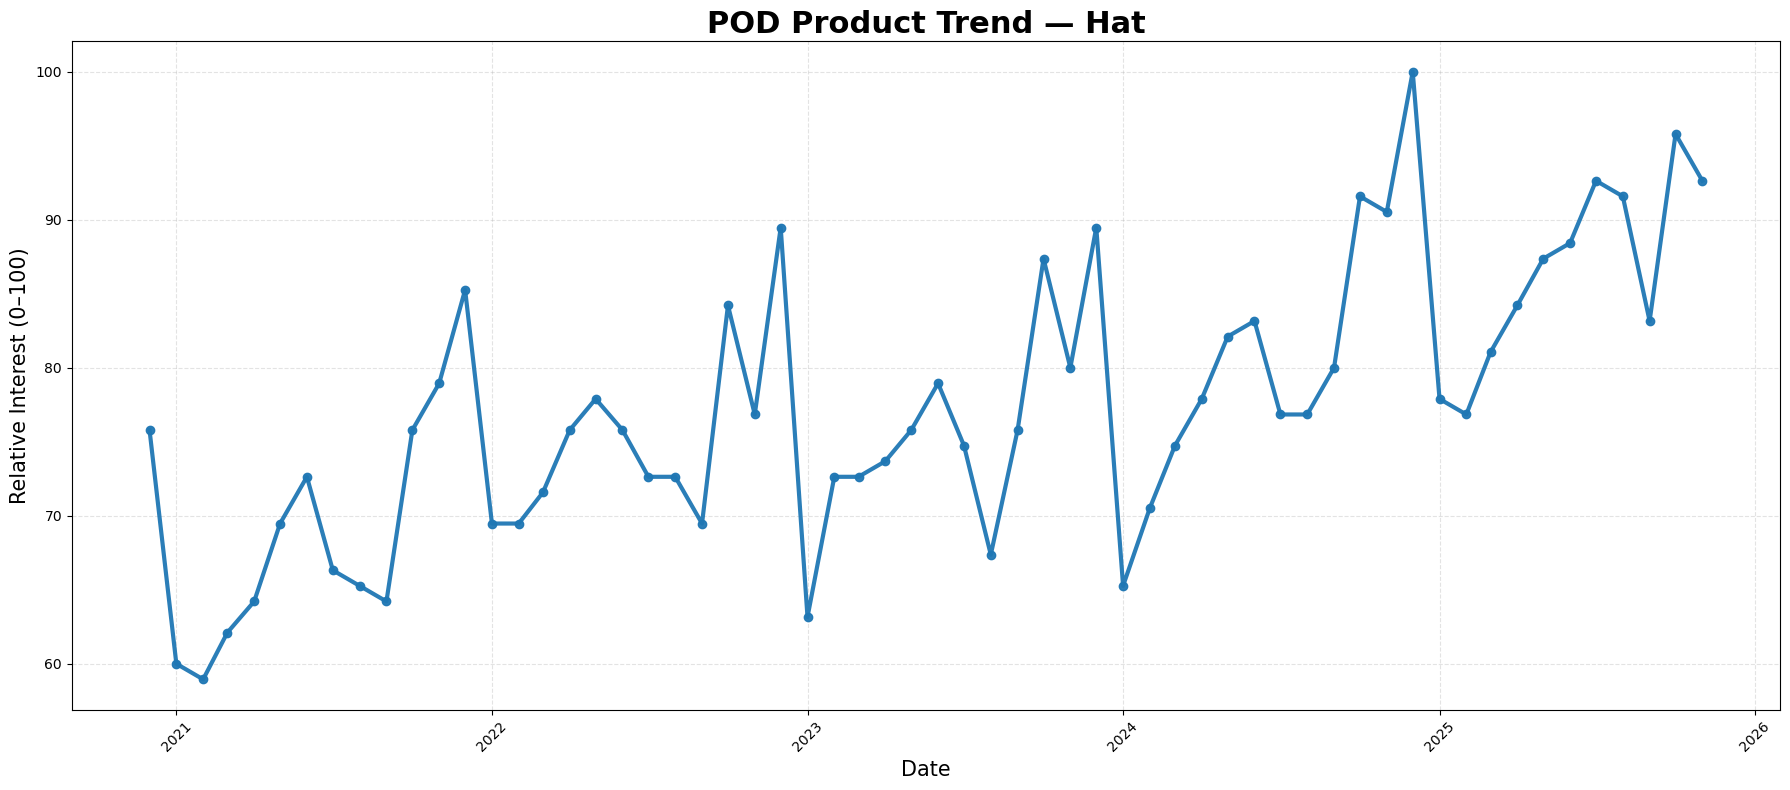

In [11]:
# HAT
import pandas as pd
import matplotlib.pyplot as plt

# Use the cleaned DataFrame: plot_df (Date + all product columns)
df_norm = plot_df.copy()

# Normalize all products (0–100 scale)
for col in products:
    max_val = df_norm[col].max()
    df_norm[col] = (df_norm[col] / max_val) * 100 if max_val > 0 else 0

# --- Ask user for product name ---
print("Available products:")
print(", ".join(products))
product_name = input("\nEnter the product name to plot: ").strip()

if product_name not in products:
    raise ValueError(f"Product '{product_name}' not found! Make sure to match the spelling exactly.")

# --- Plot the selected product ---
plt.figure(figsize=(18, 8))
plt.plot(
    df_norm["Date"],
    df_norm[product_name],
    linewidth=3,
    marker='o',
    color="#1f77b4",
    alpha=0.95
)

plt.title(f"POD Product Trend — {product_name.title()}", fontsize=22, fontweight="bold")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Relative Interest (0–100)", fontsize=15)
plt.grid(True, linestyle="--", alpha=0.35)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### TOTE BAG

Available products:
t-shirt, tote bag, hat, cap, hoodie, mug, socks, blanket, calendar, stickers, sticker, bag, backpack, phone case, mousepad, keychain, Poster, wall art, canvas print, canvas


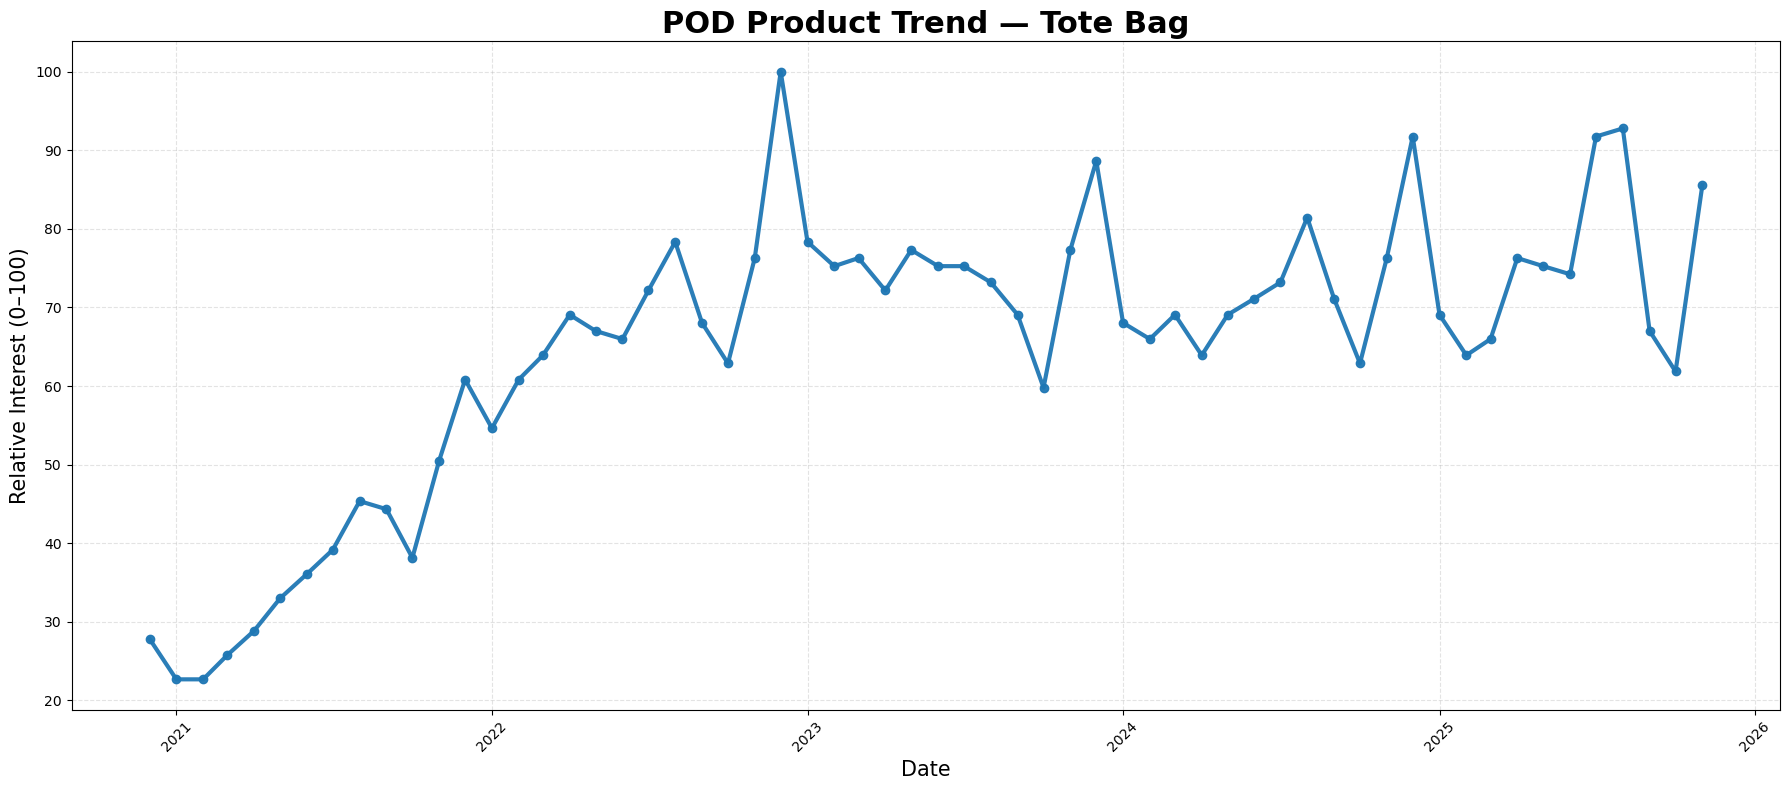

In [13]:
# TOTE BAG
import pandas as pd
import matplotlib.pyplot as plt

# Use the cleaned DataFrame: plot_df (Date + all product columns)
df_norm = plot_df.copy()

# Normalize all products (0–100 scale)
for col in products:
    max_val = df_norm[col].max()
    df_norm[col] = (df_norm[col] / max_val) * 100 if max_val > 0 else 0

# --- Ask user for product name ---
print("Available products:")
print(", ".join(products))
product_name = input("\nEnter the product name to plot: ").strip()

if product_name not in products:
    raise ValueError(f"Product '{product_name}' not found! Make sure to match the spelling exactly.")

# --- Plot the selected product ---
plt.figure(figsize=(18, 8))
plt.plot(
    df_norm["Date"],
    df_norm[product_name],
    linewidth=3,
    marker='o',
    color="#1f77b4",
    alpha=0.95
)

plt.title(f"POD Product Trend — {product_name.title()}", fontsize=22, fontweight="bold")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Relative Interest (0–100)", fontsize=15)
plt.grid(True, linestyle="--", alpha=0.35)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
